In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_hdf("all_wind.h5")

In [4]:
df.windPressure.unique()

array(['0.', '0.5', '1.', '1.5', '2.', '2.5', '3.', '3.5', '4.', '4.5',
       '4.8'], dtype=object)

In [5]:
def remove_unnecessary_coulumns():
    global df
    for nam in df.columns:
        if len(df[nam].unique()) == 1 :
            print(nam)
            df.drop([nam],axis=1,inplace=True)
remove_unnecessary_coulumns()

trajectory__boutFrame
trajectory__compensation
trajectory__gain
trajectory__impose
trajectory__imposeHeading
trajectory__imposeResponse
trajectory__imposeResponseHeading
trajectory__imposeResponseSmooth
trajectory__key
trajectory__o1Pos_x
trajectory__o1Pos_y
trajectory__o1Pos_z
trajectory__o2Pos_x
trajectory__o2Pos_y
trajectory__o2Pos_z
trajectory__pOri_y
trajectory__pOri_z
trajectory__packetDuration
trajectory__packetFrequency
trajectory__pfStimState
trajectory__quadrant
trajectory__speedControl
trajectory__valve1
trajectory__valve2
trajectory__valve3


In [34]:
dff=df[(df.visual == "null") & (df.trajectory__case!=0)]

In [31]:
df2.columns

Index(['trajectory__DCoffset', 'trajectory__case', 'trajectory__groundSpeed',
       'trajectory__headingControl', 'trajectory__isFlying',
       'trajectory__pOri_x', 'trajectory__pPos_x', 'trajectory__pPos_y',
       'trajectory__pPos_z', 'trajectory__reset', 'trajectory__runNum',
       'trajectory__servoAngle', 'trajectory__slip', 'trajectory__speed',
       'trajectory__trial', 'trajectory__wbad', 'trajectory__wbas',
       'windPressure', 'visual', 'flowSource', 'timeStamp'],
      dtype='object')

In [32]:
df2.shape

(572727, 21)

In [ ]:
df2.

In [12]:
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

In [35]:
files=dff.timeStamp.unique()

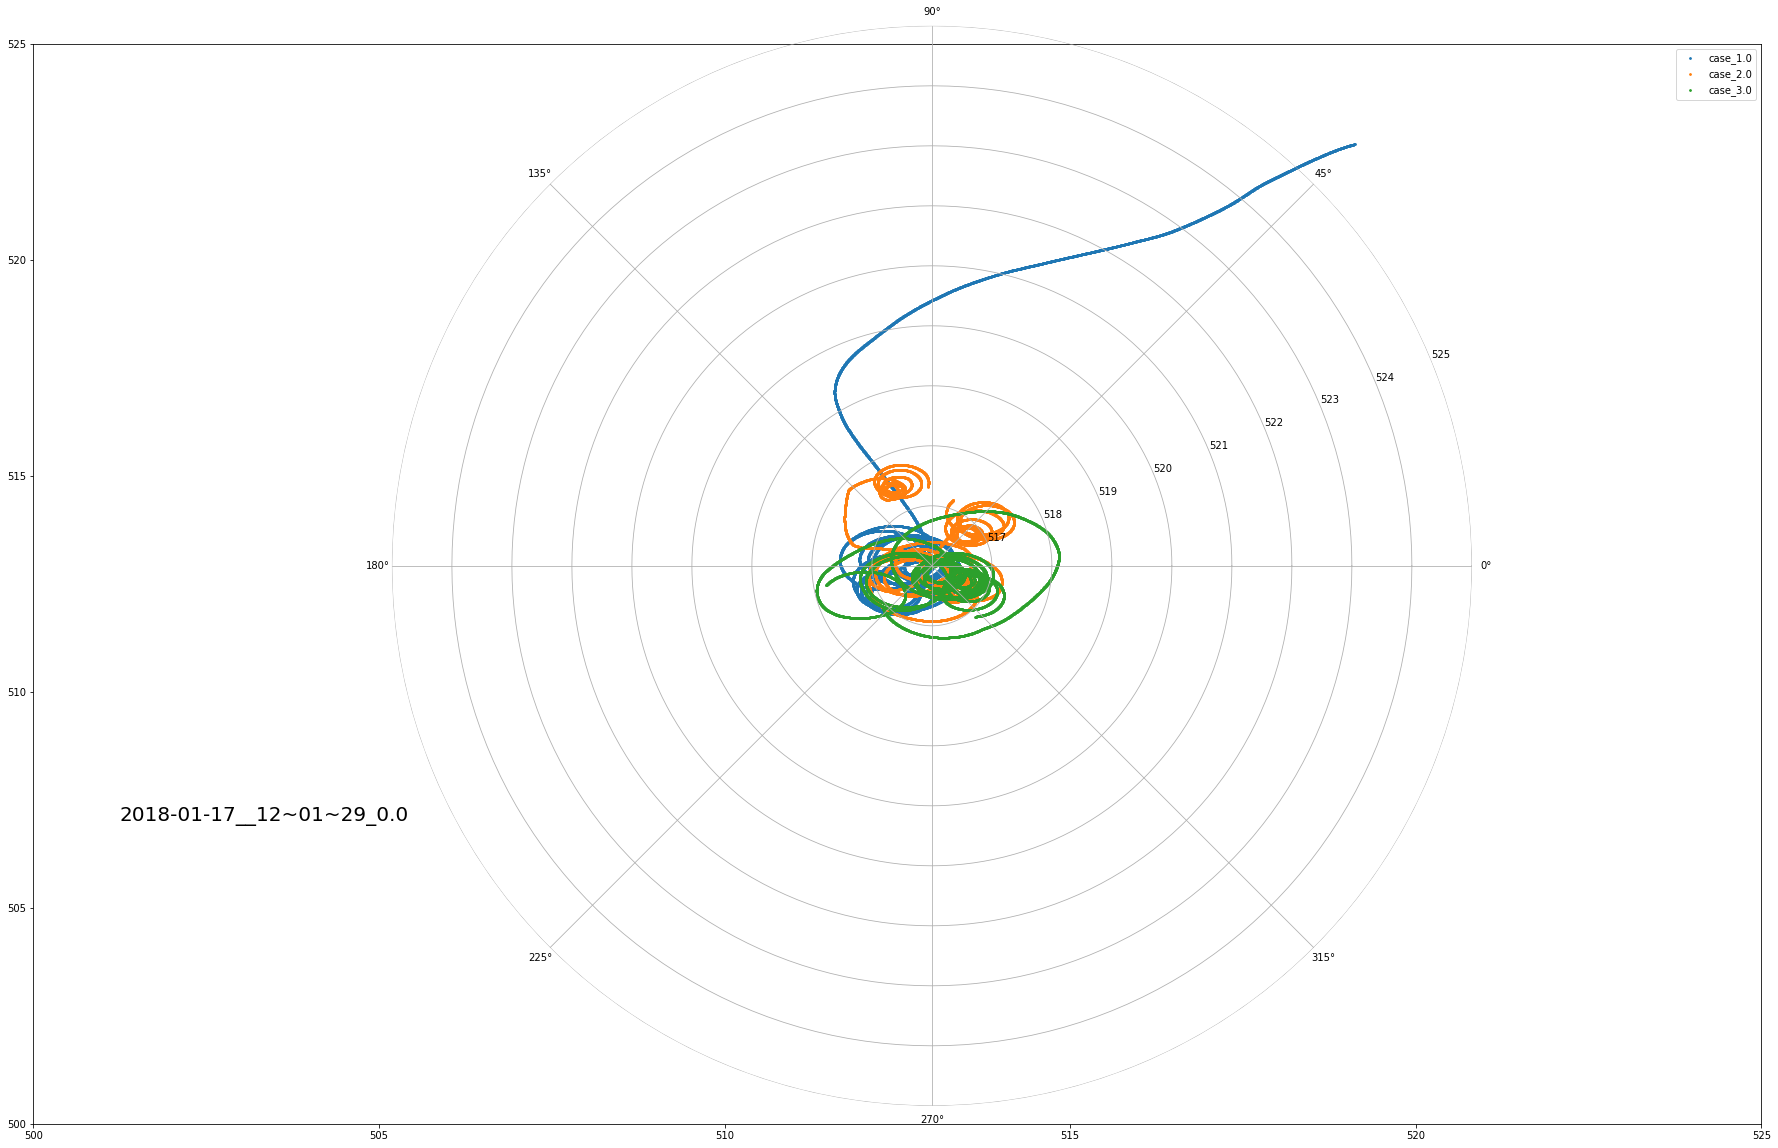

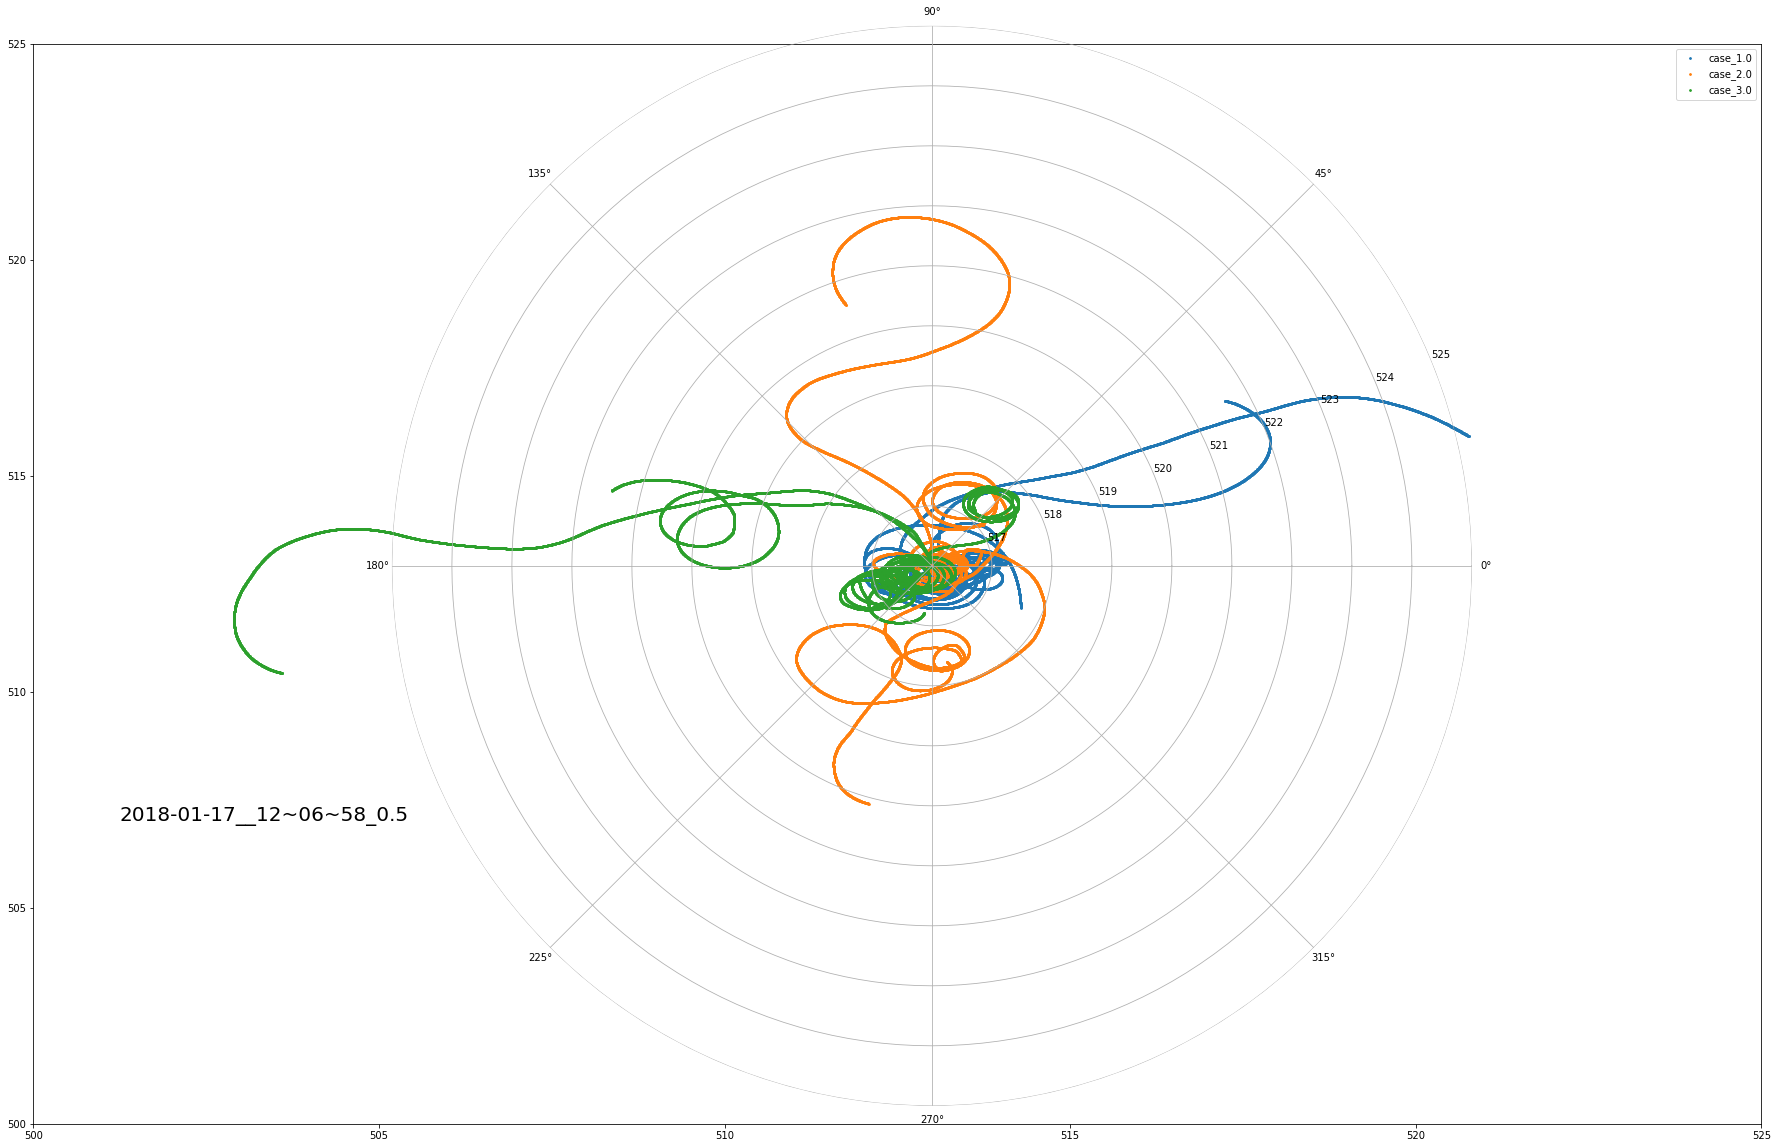

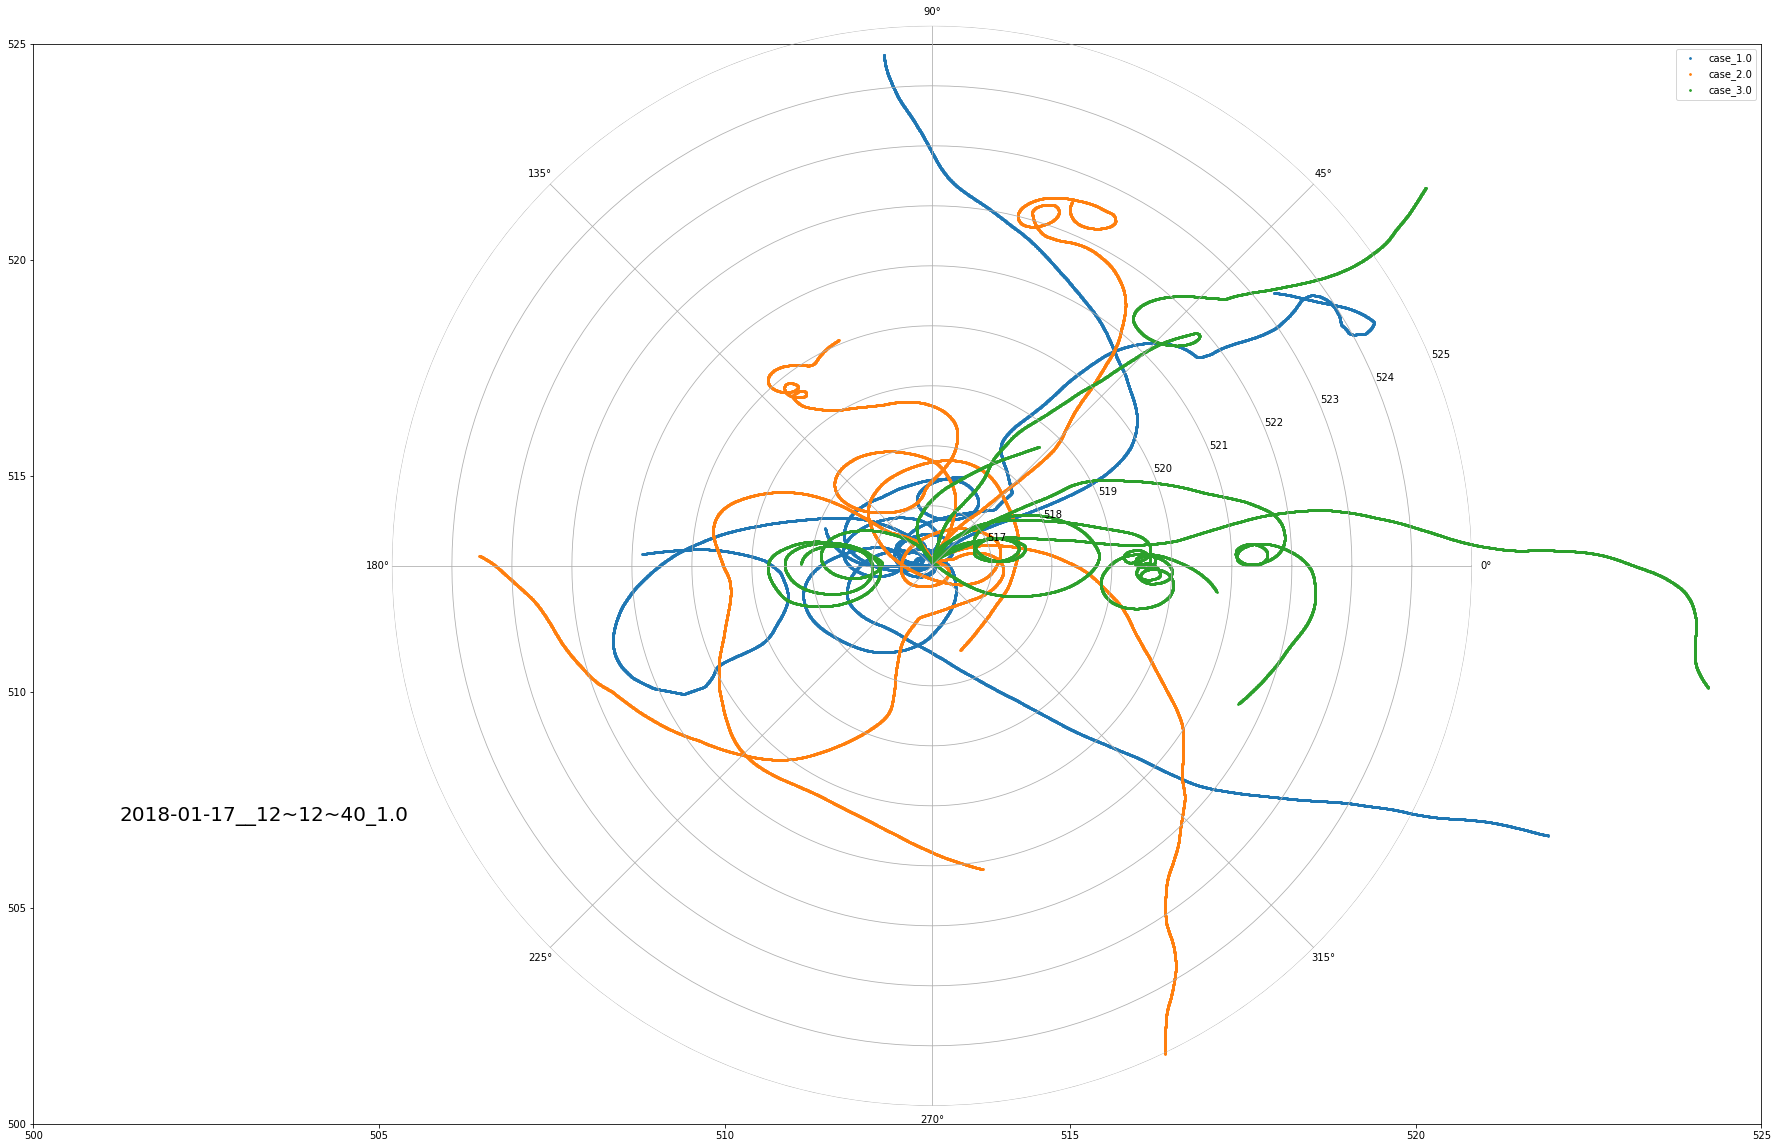

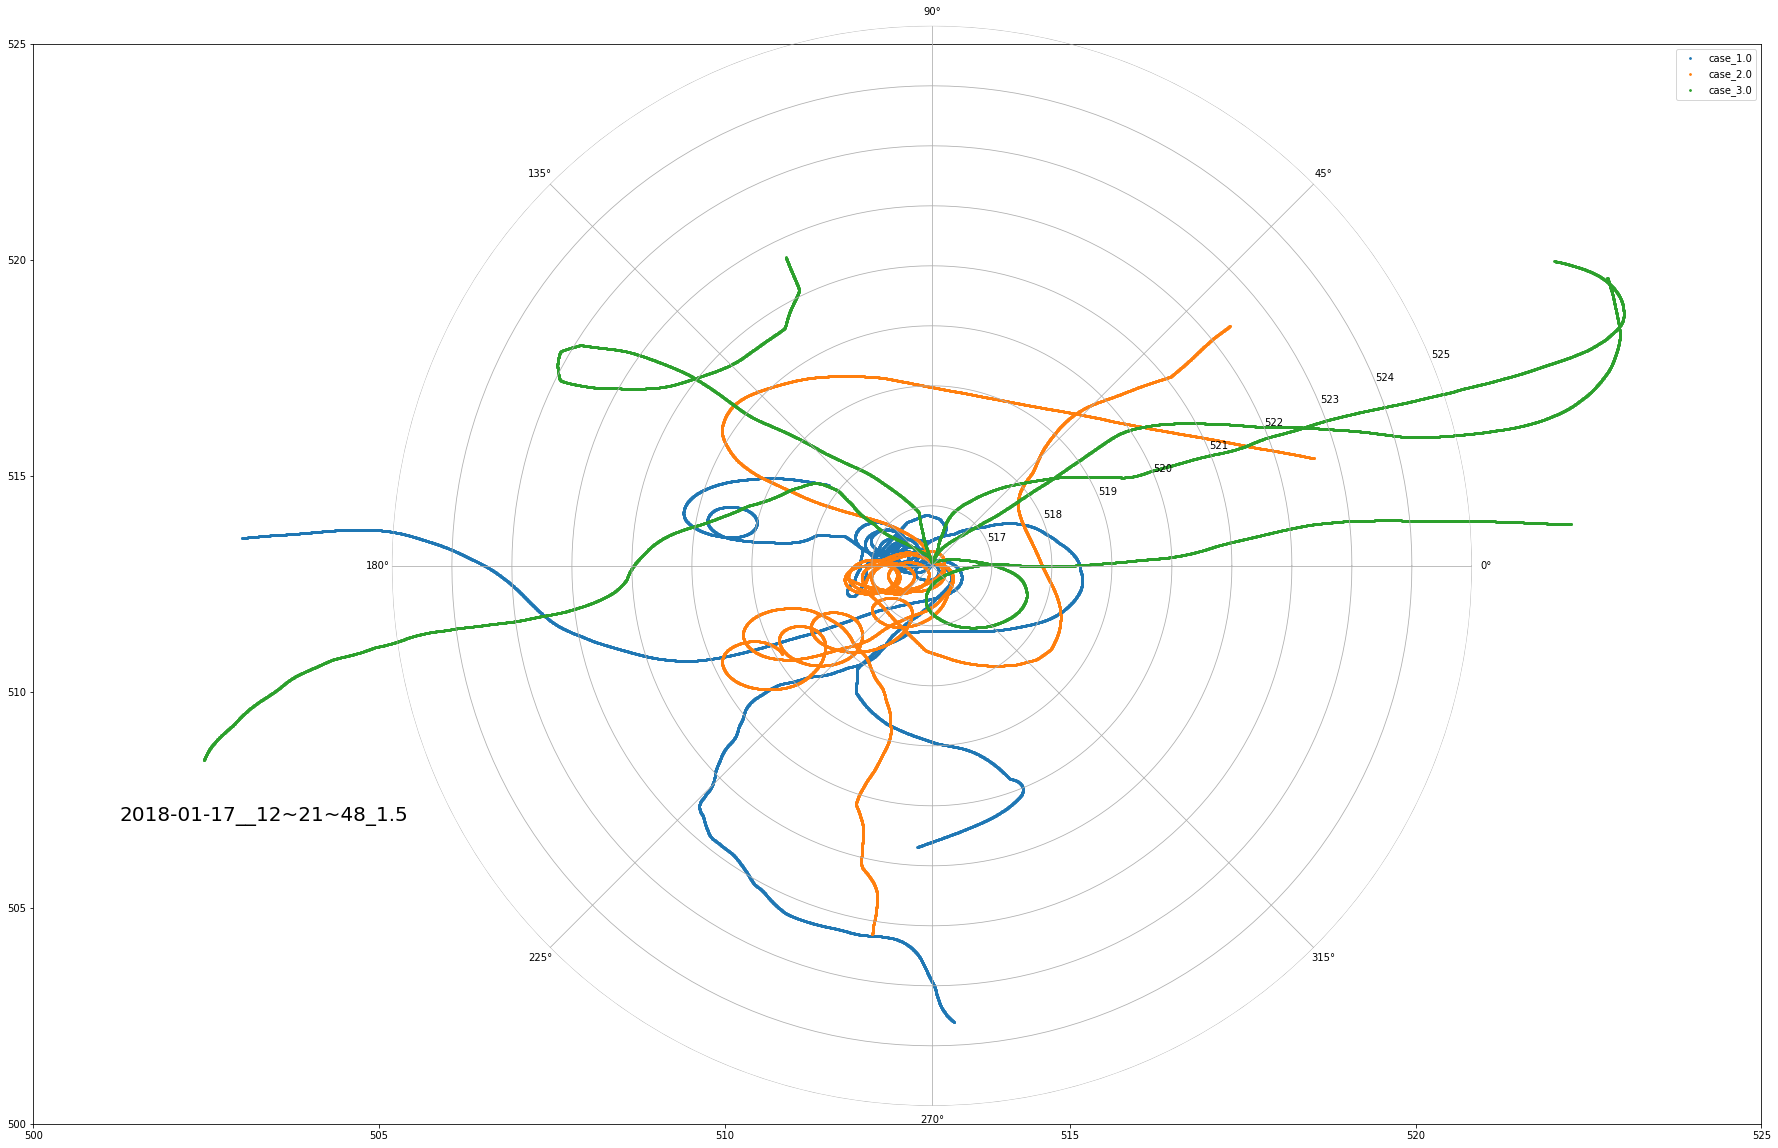

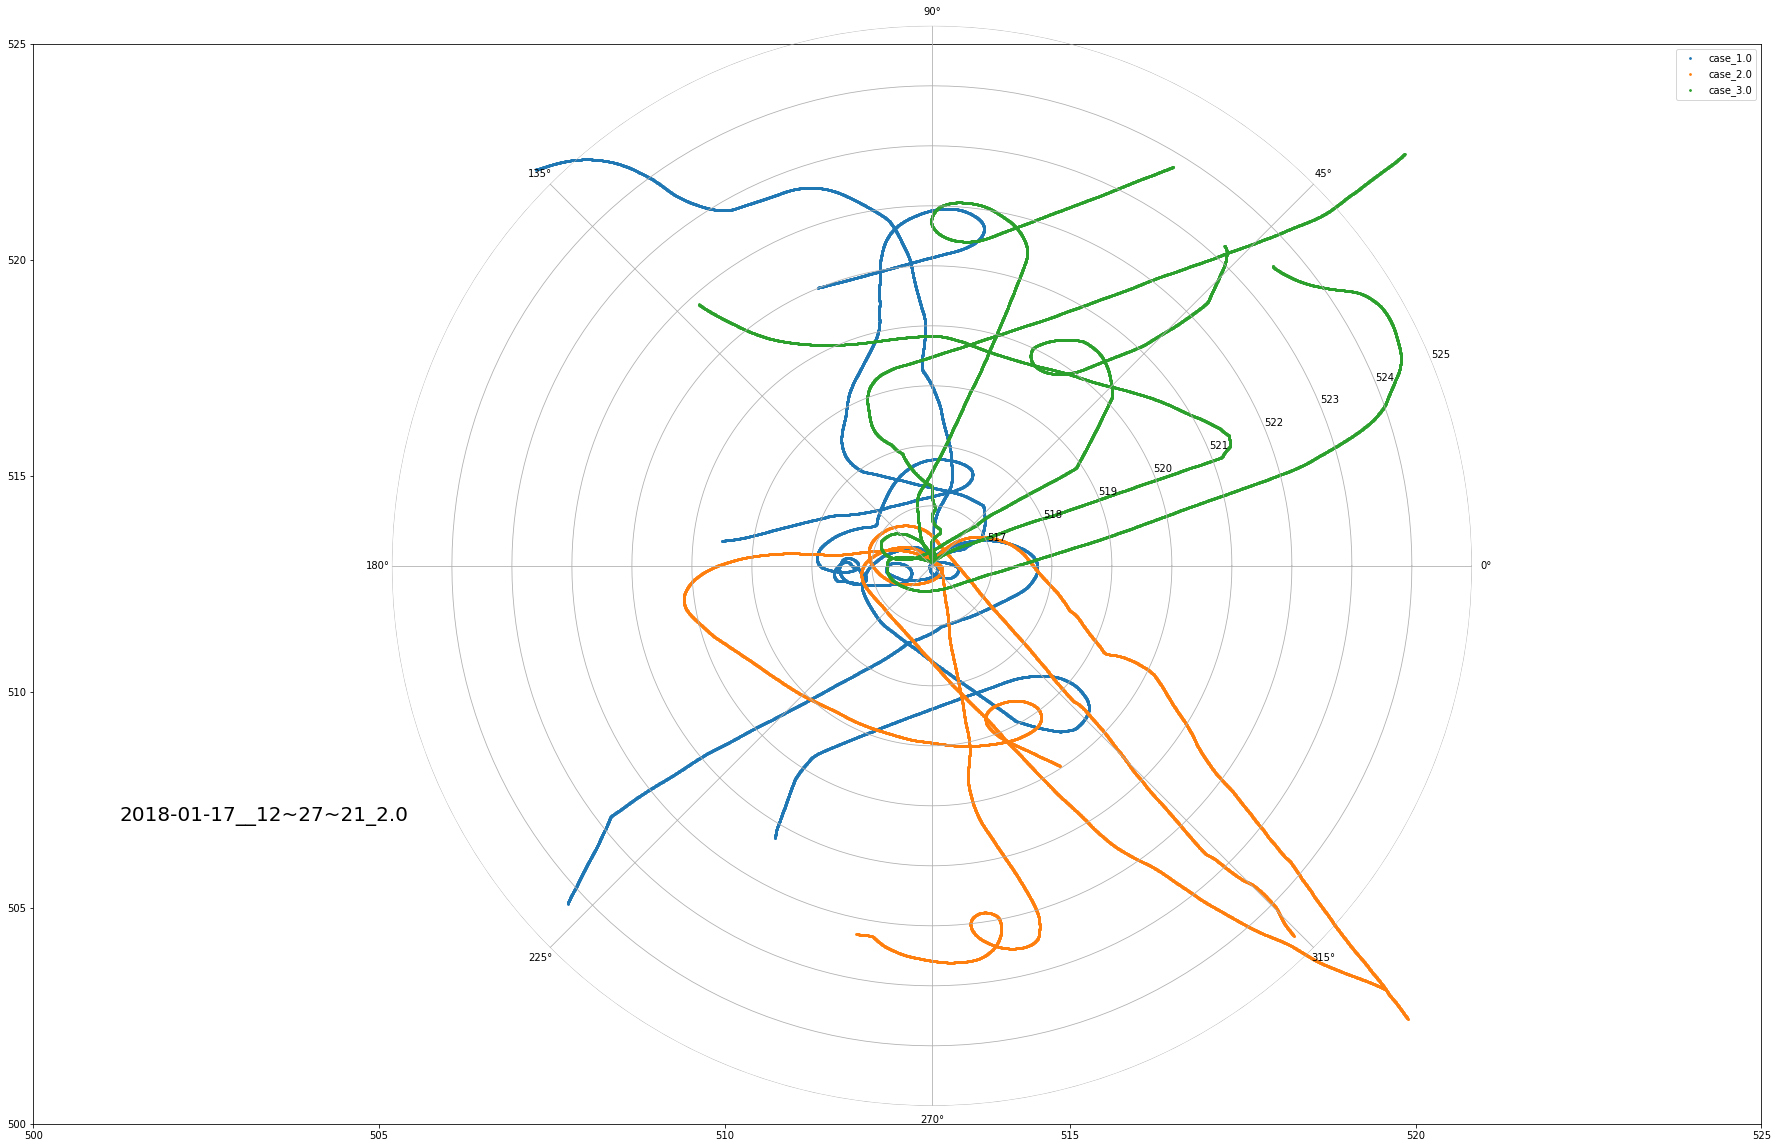

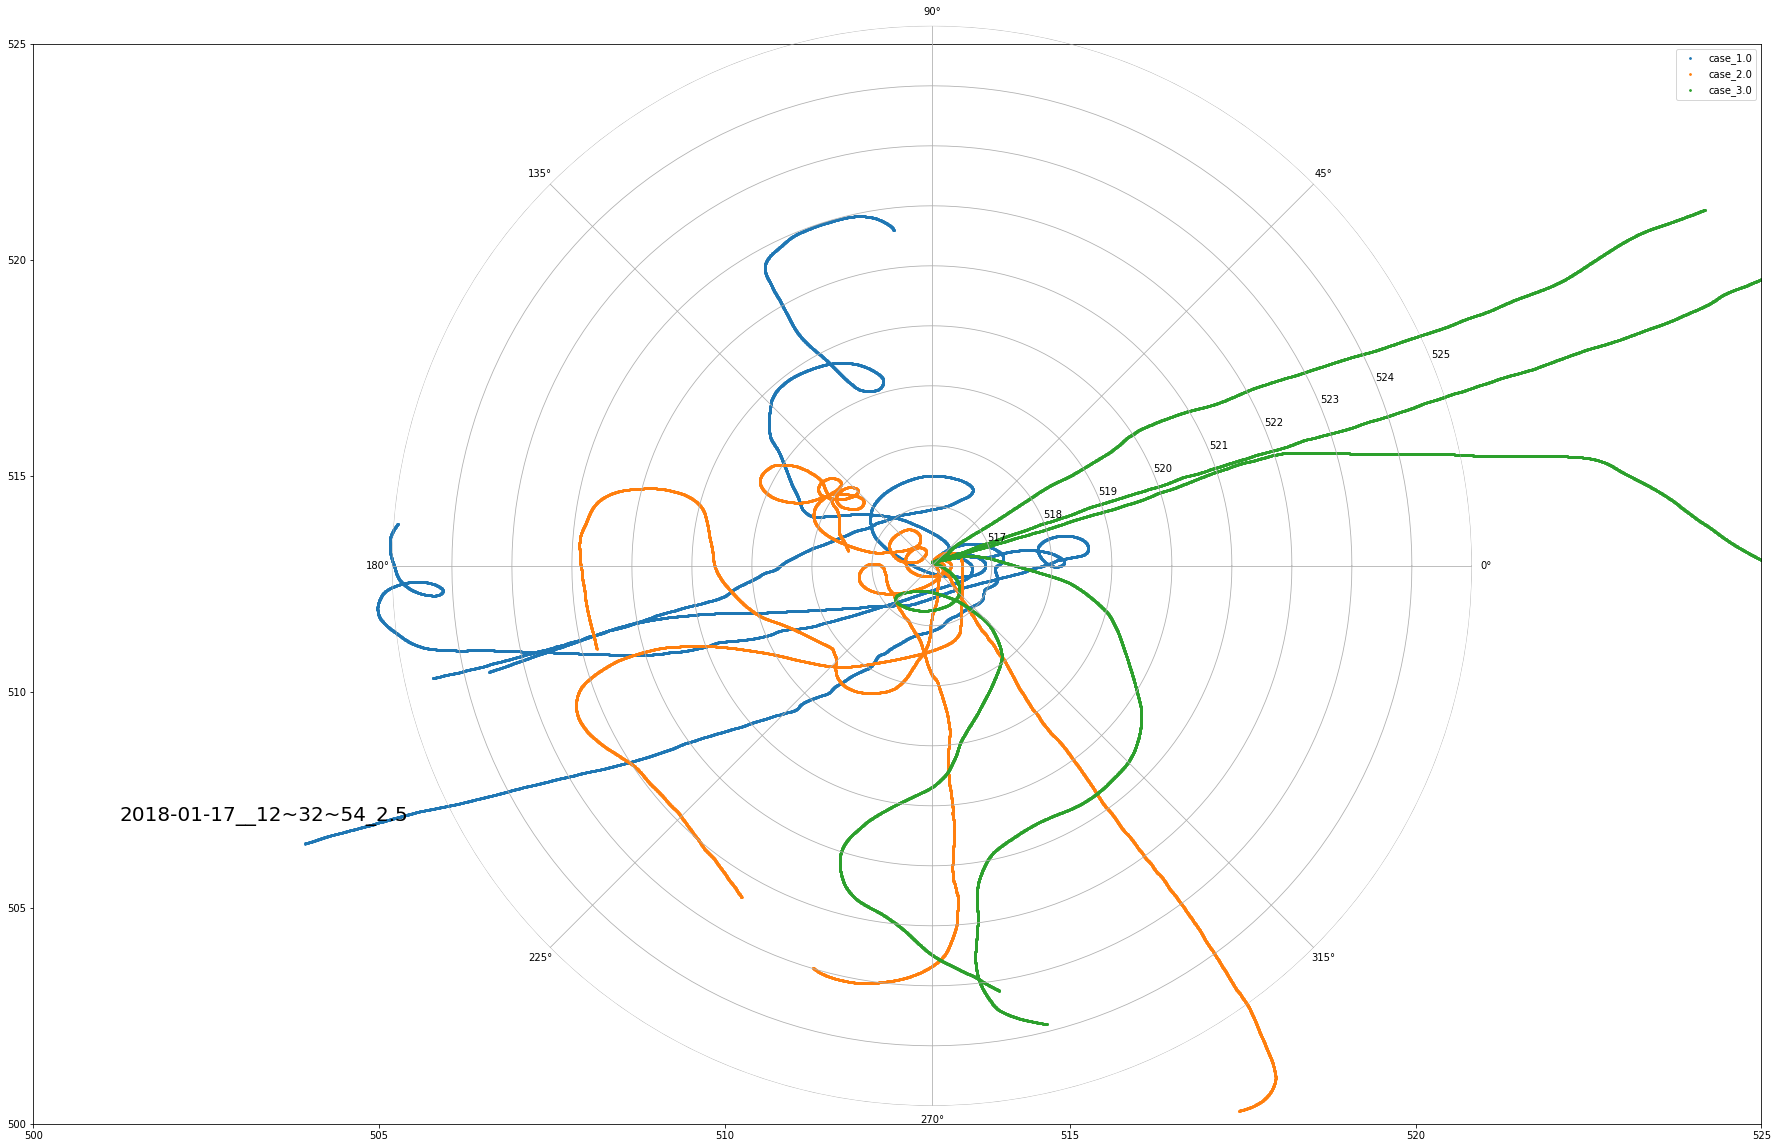

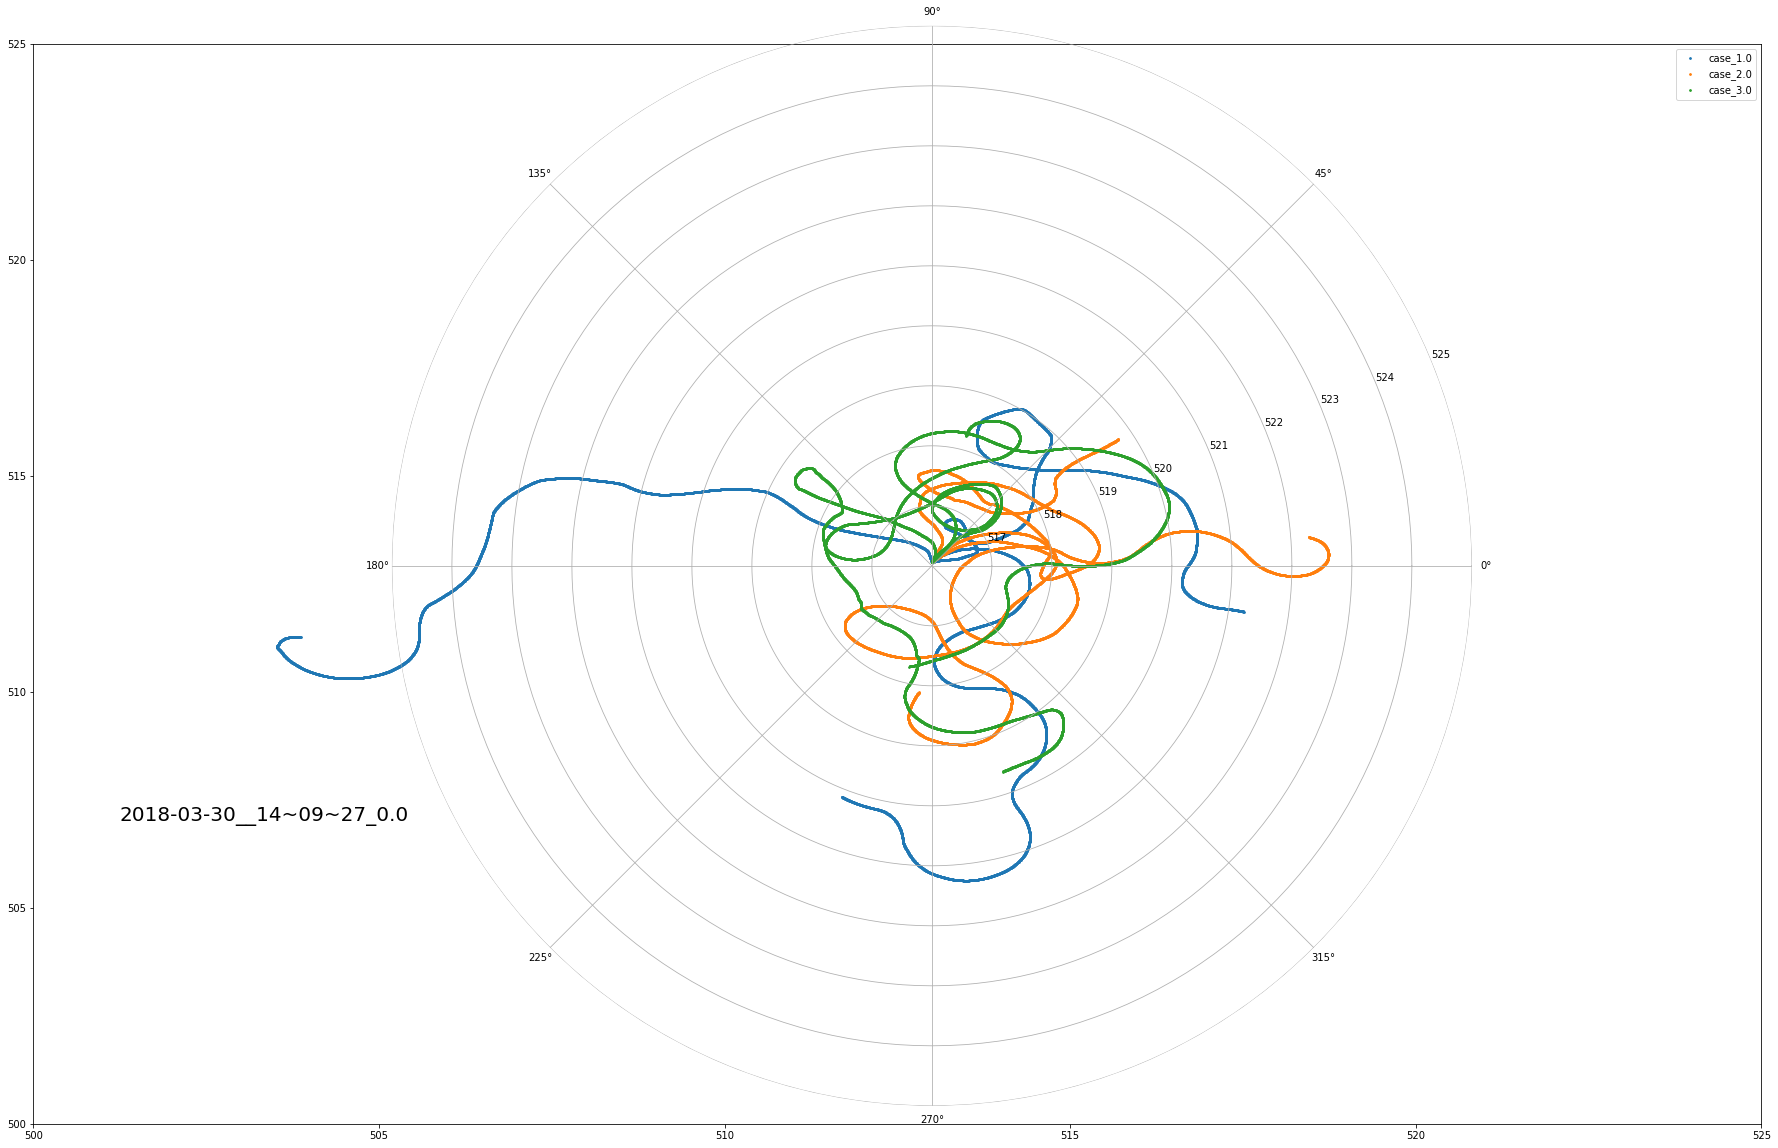

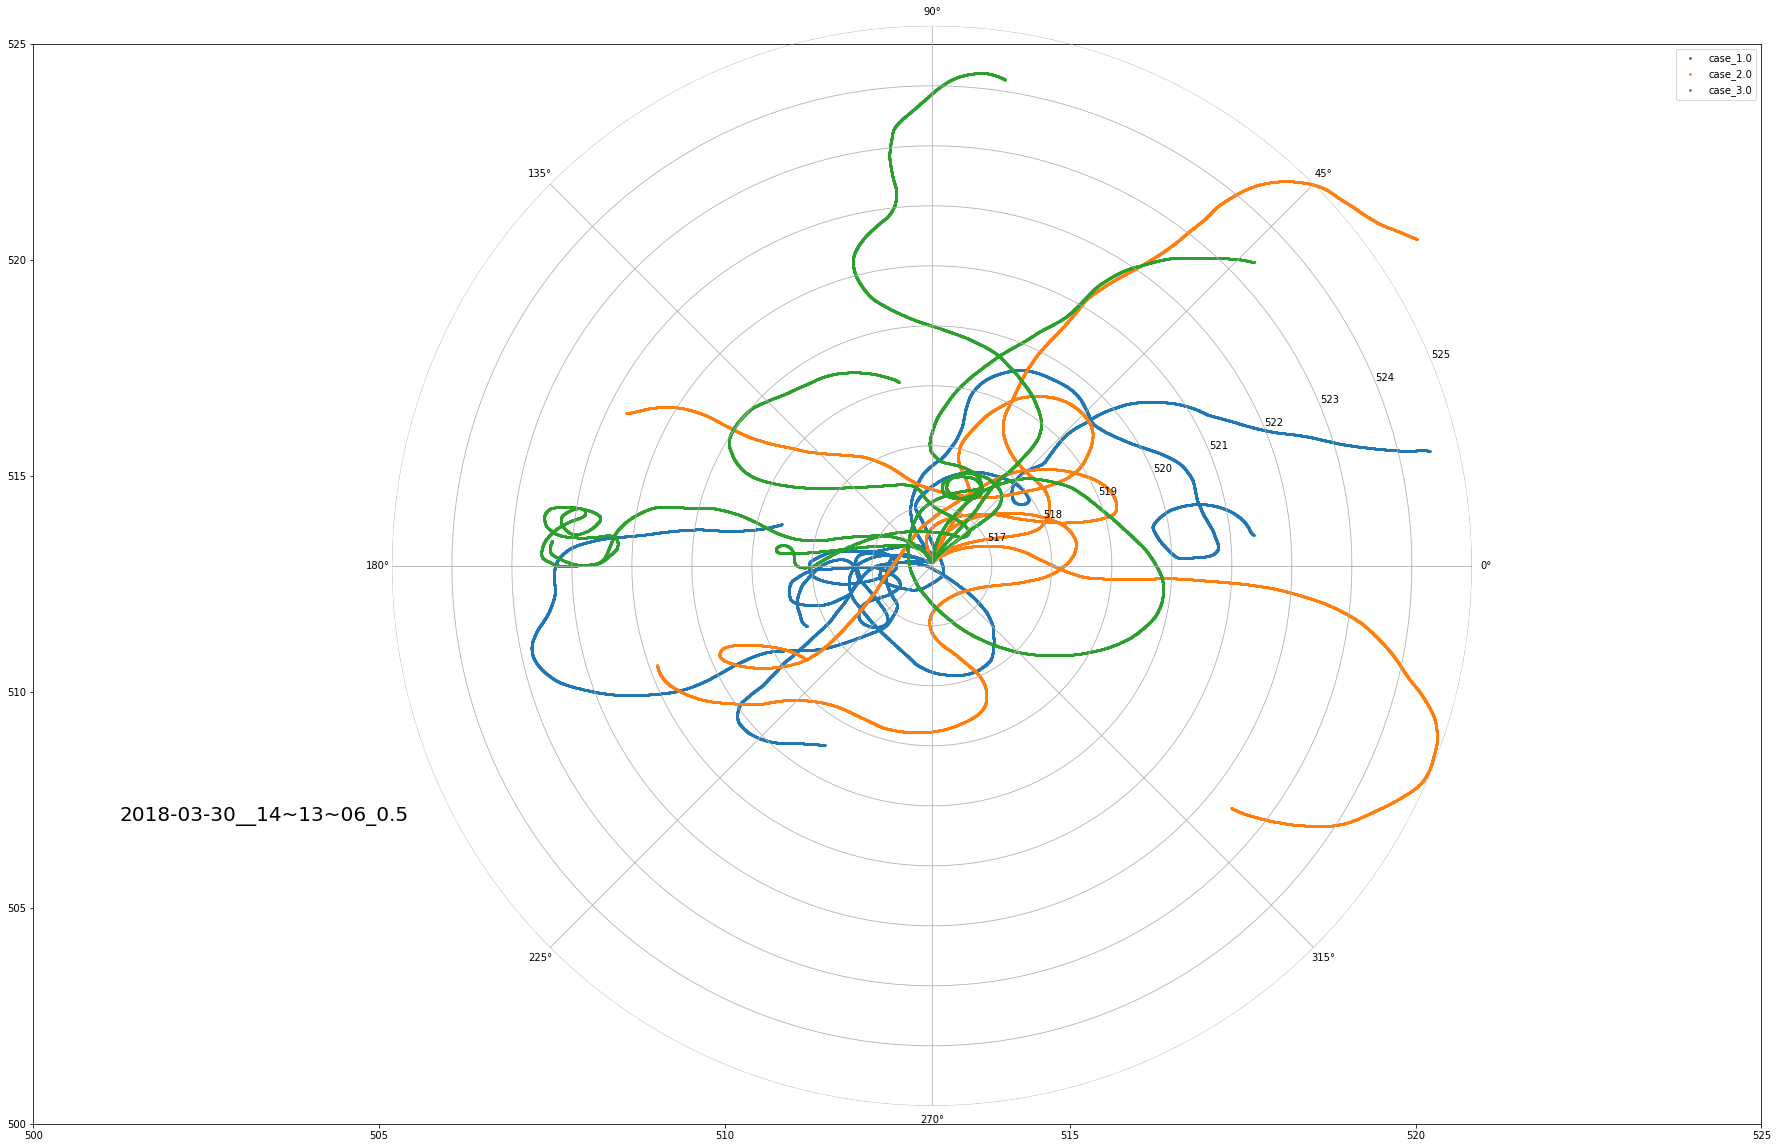

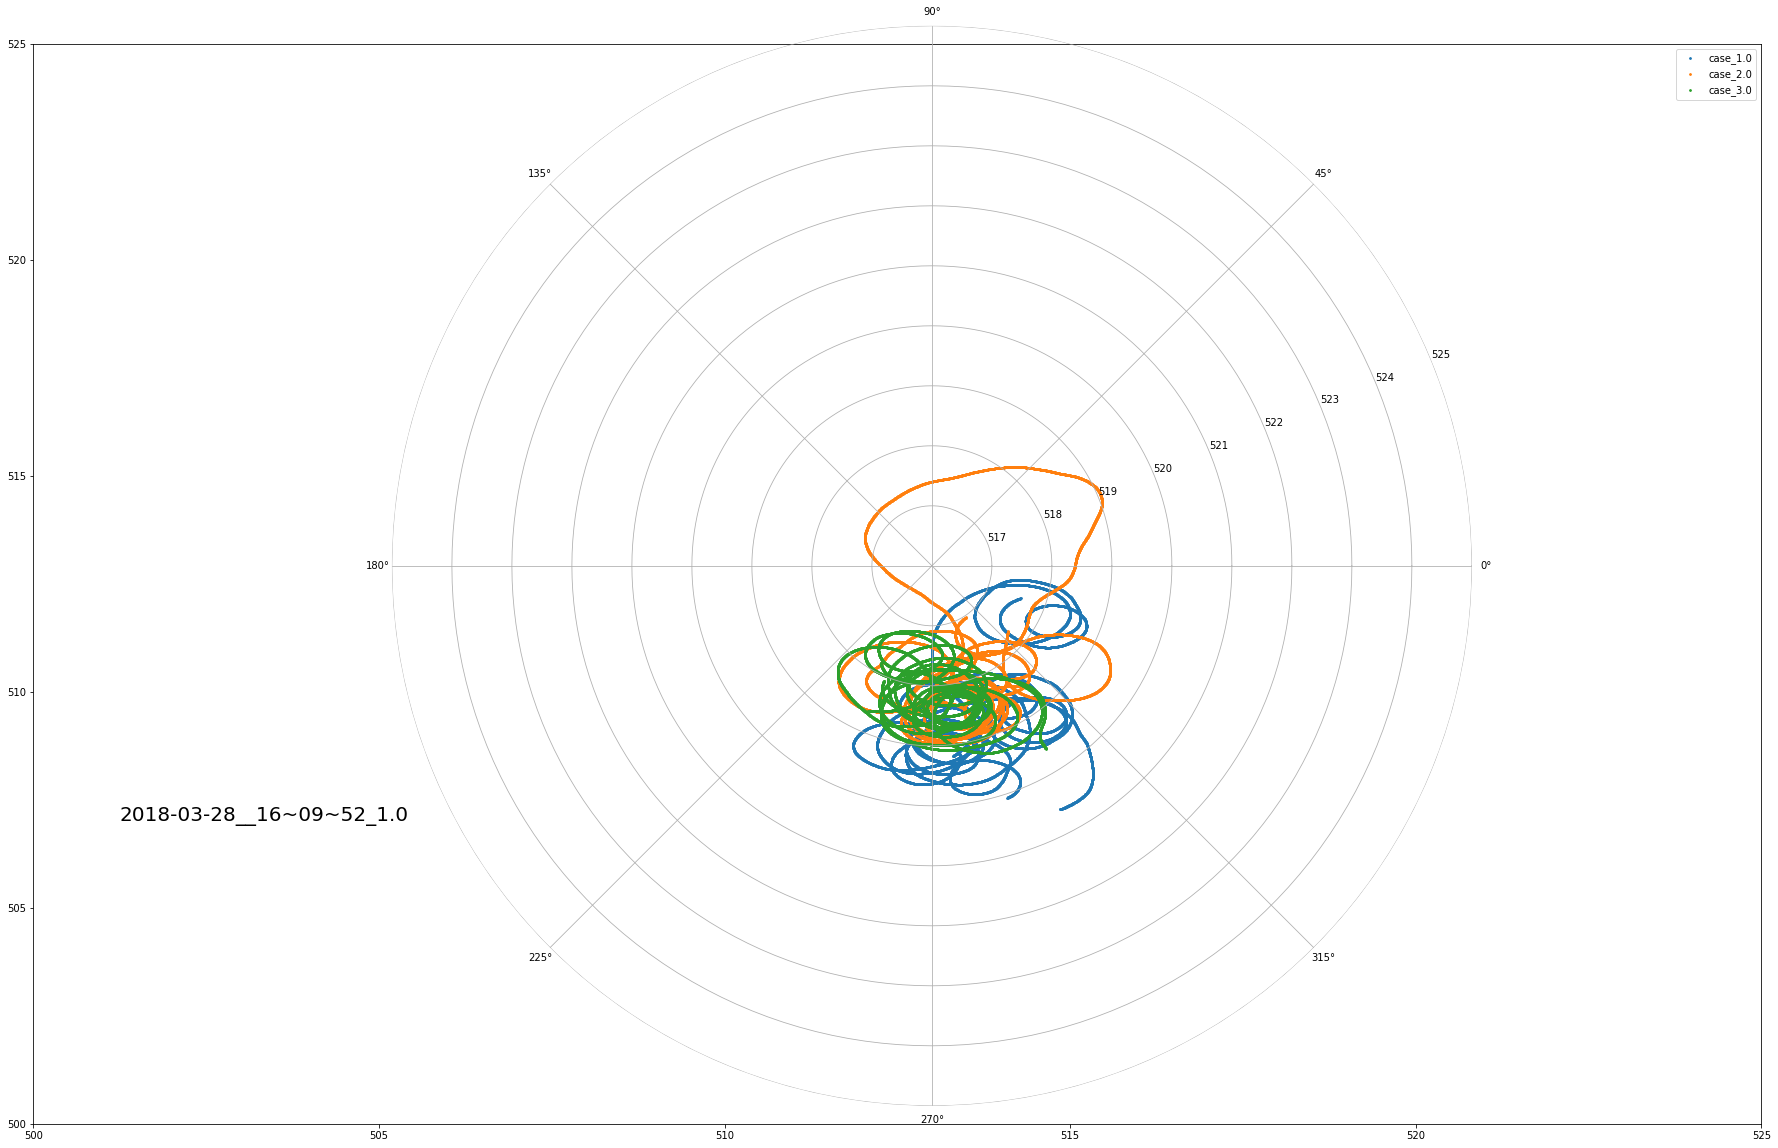

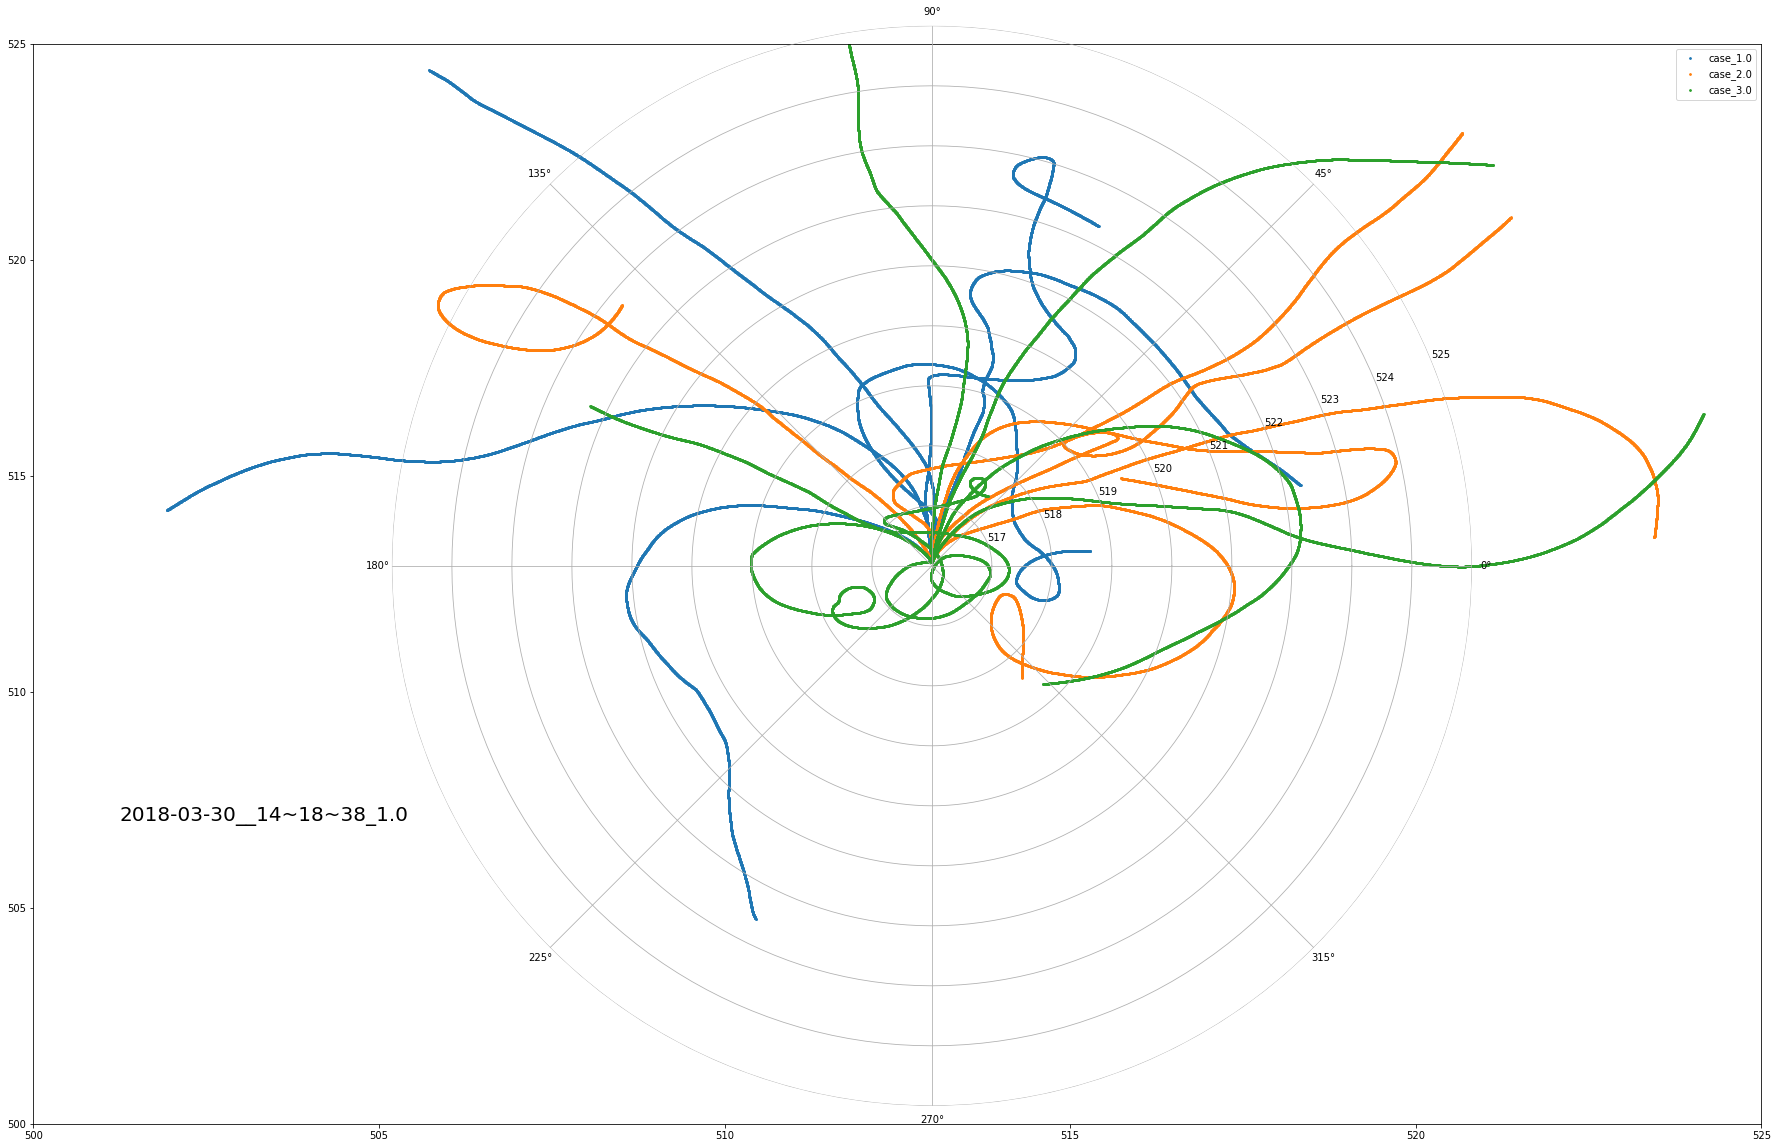

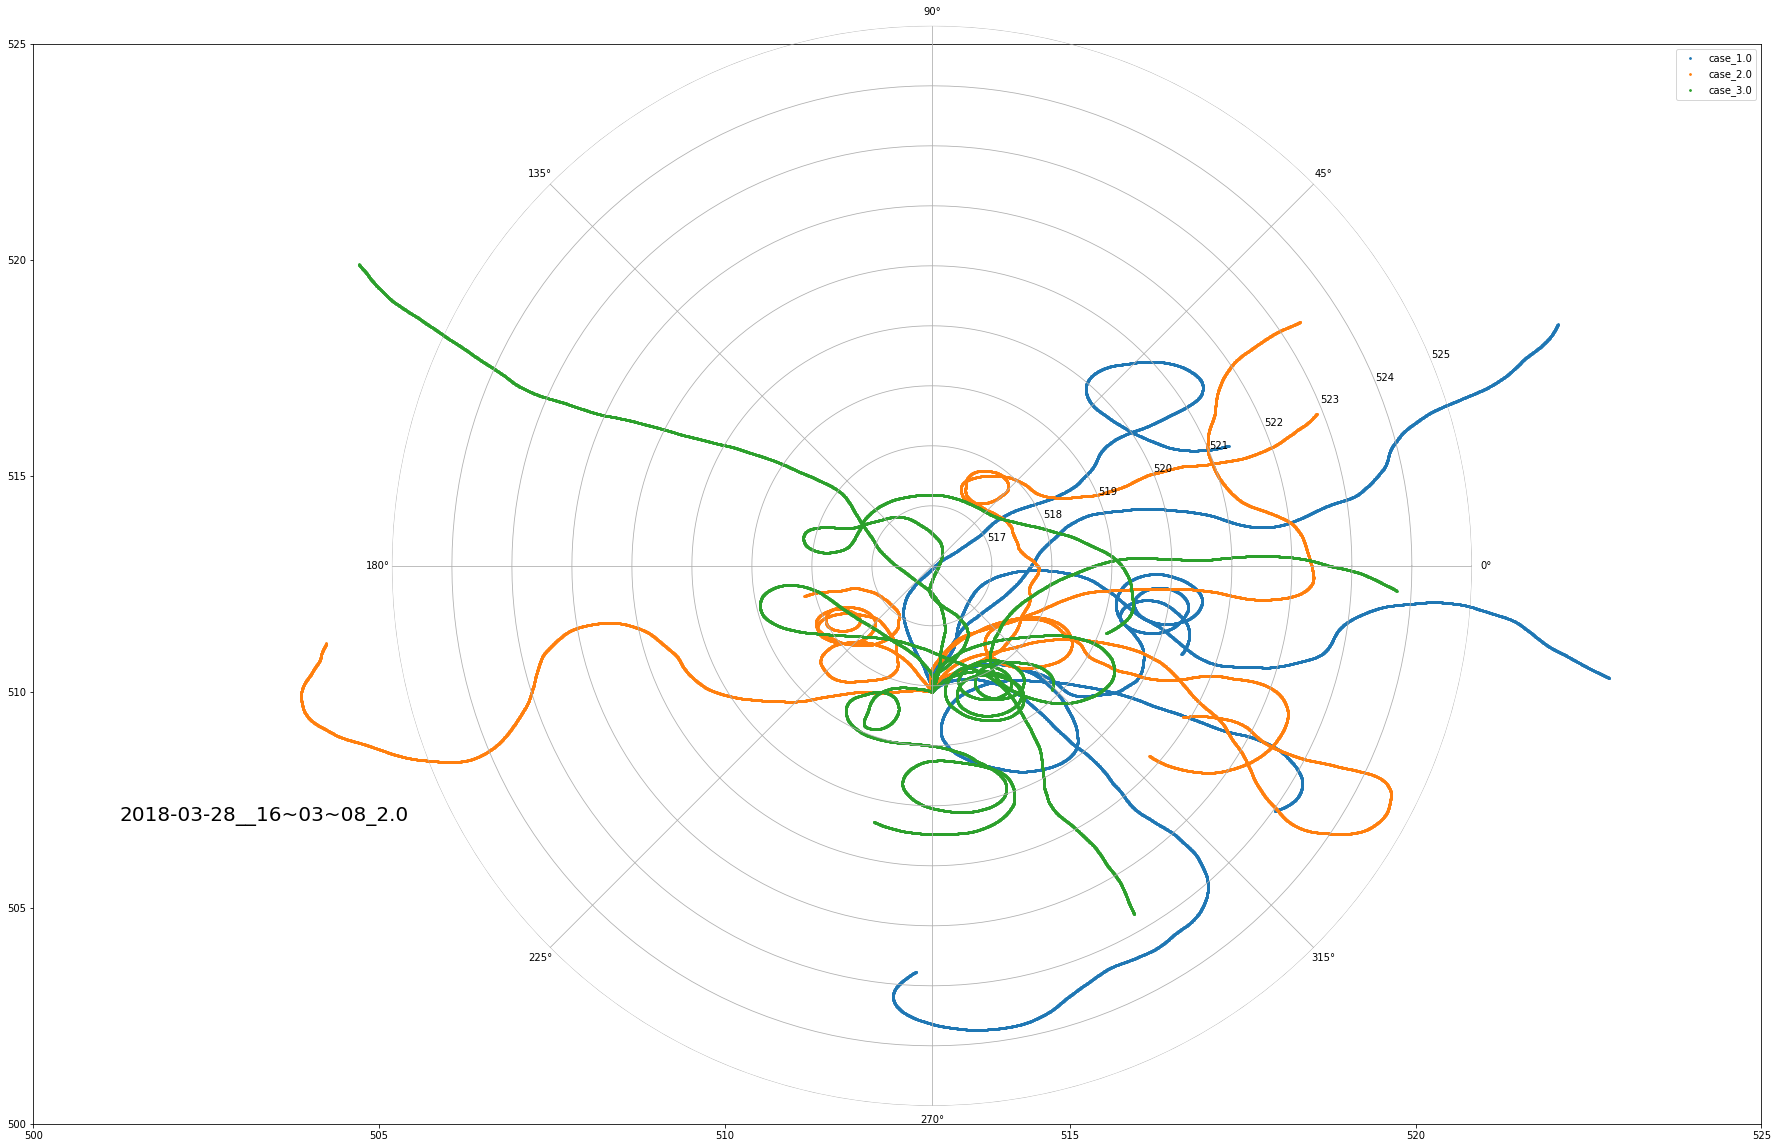

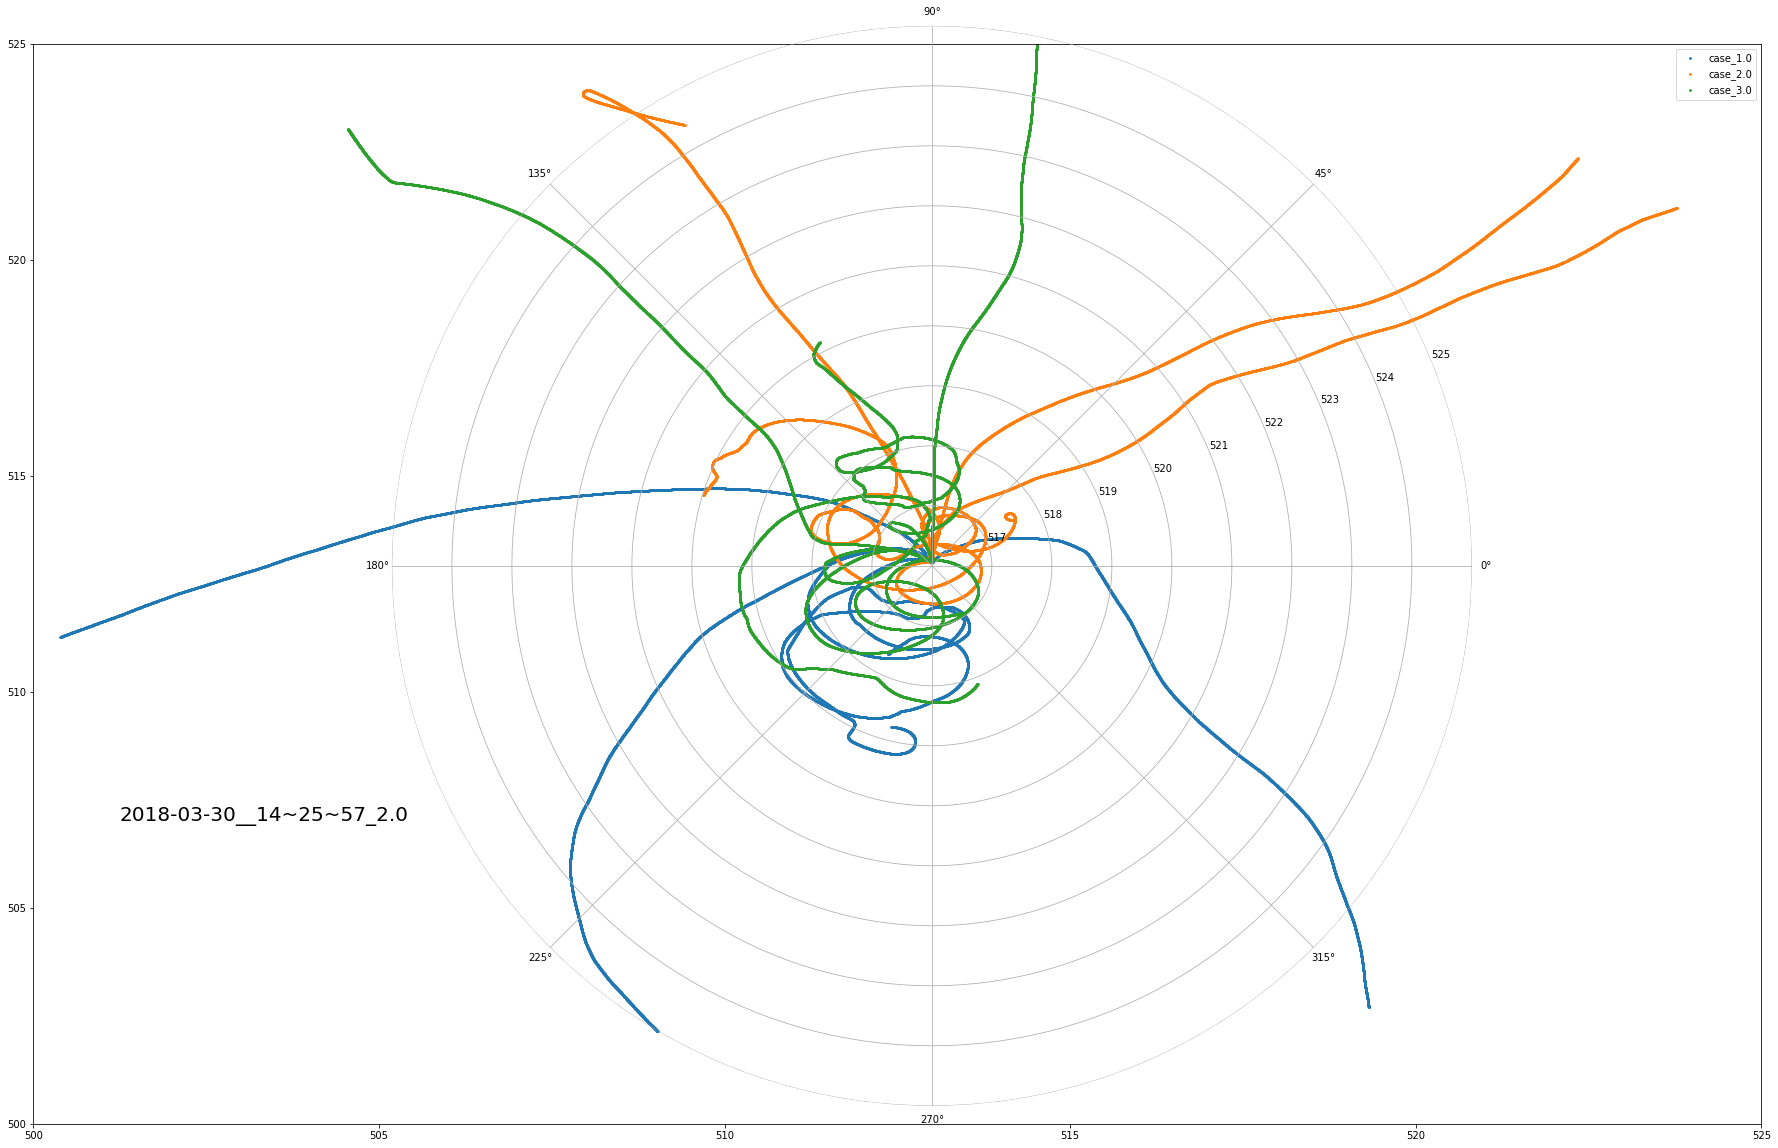

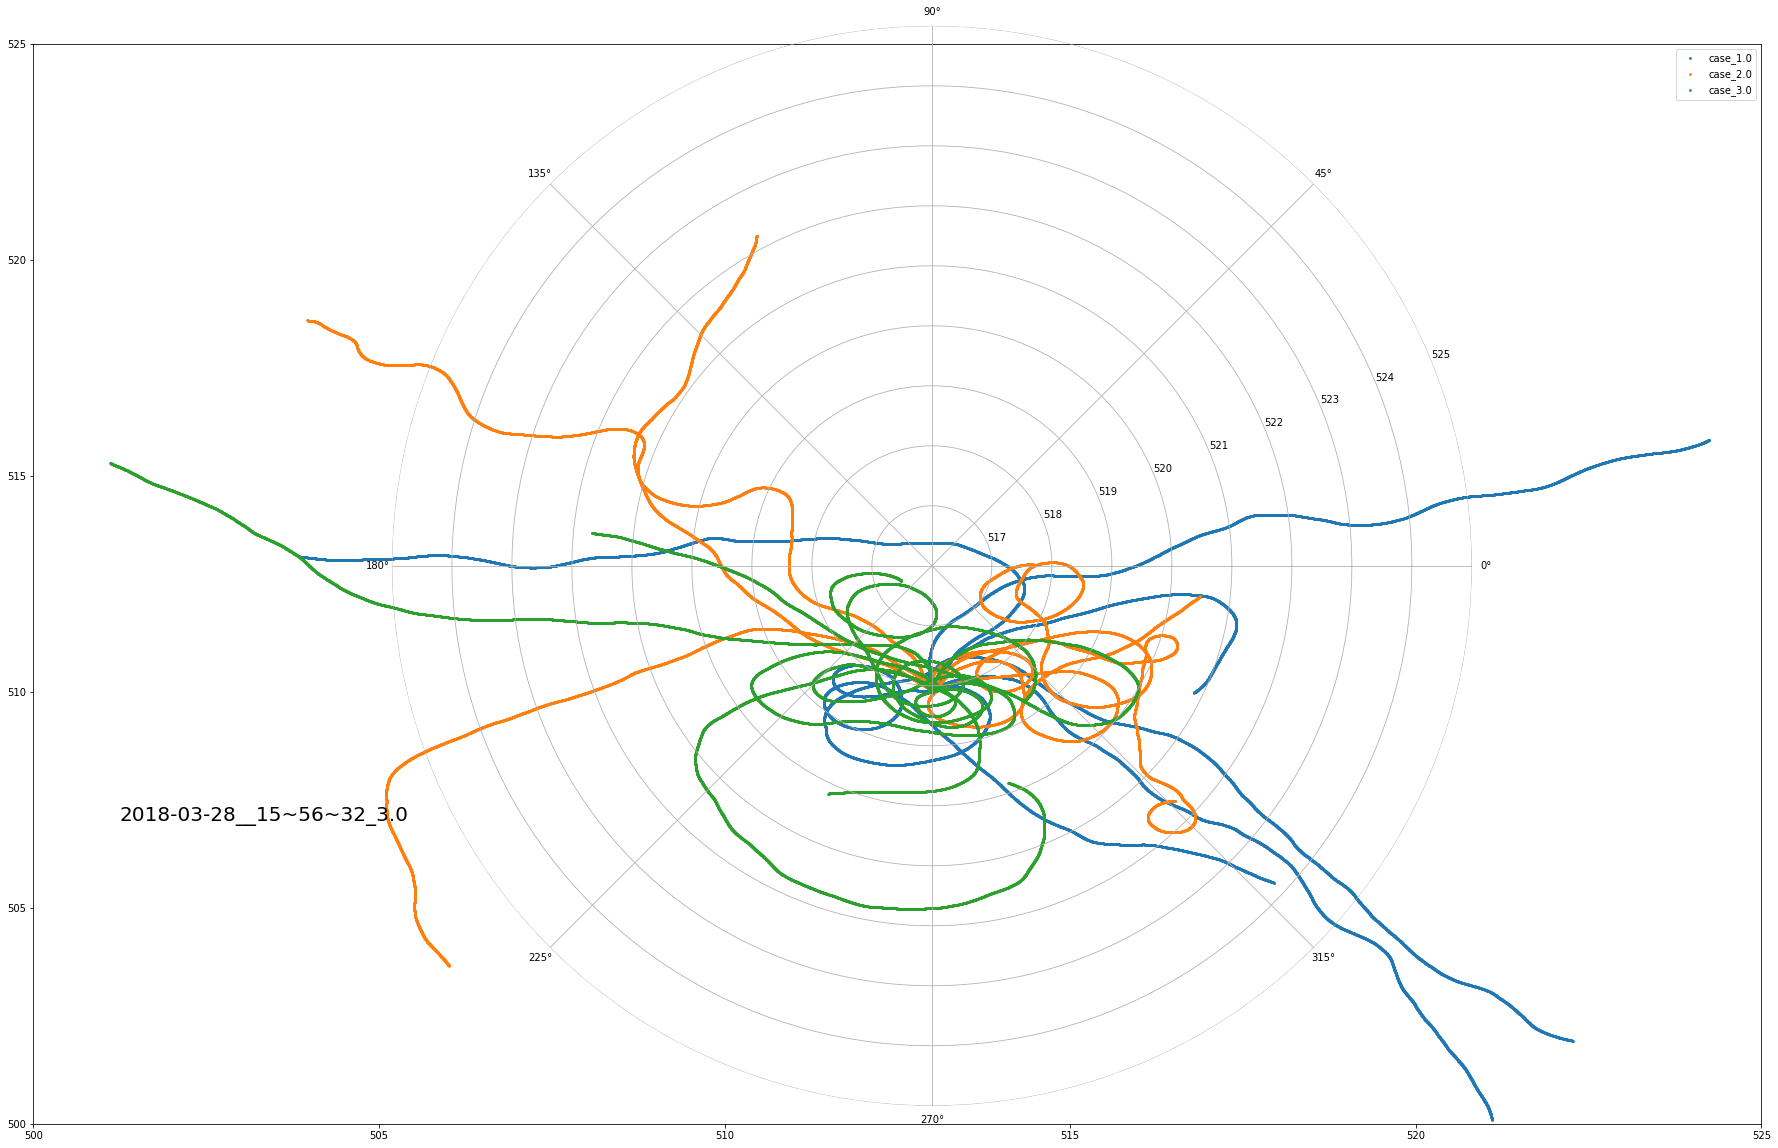

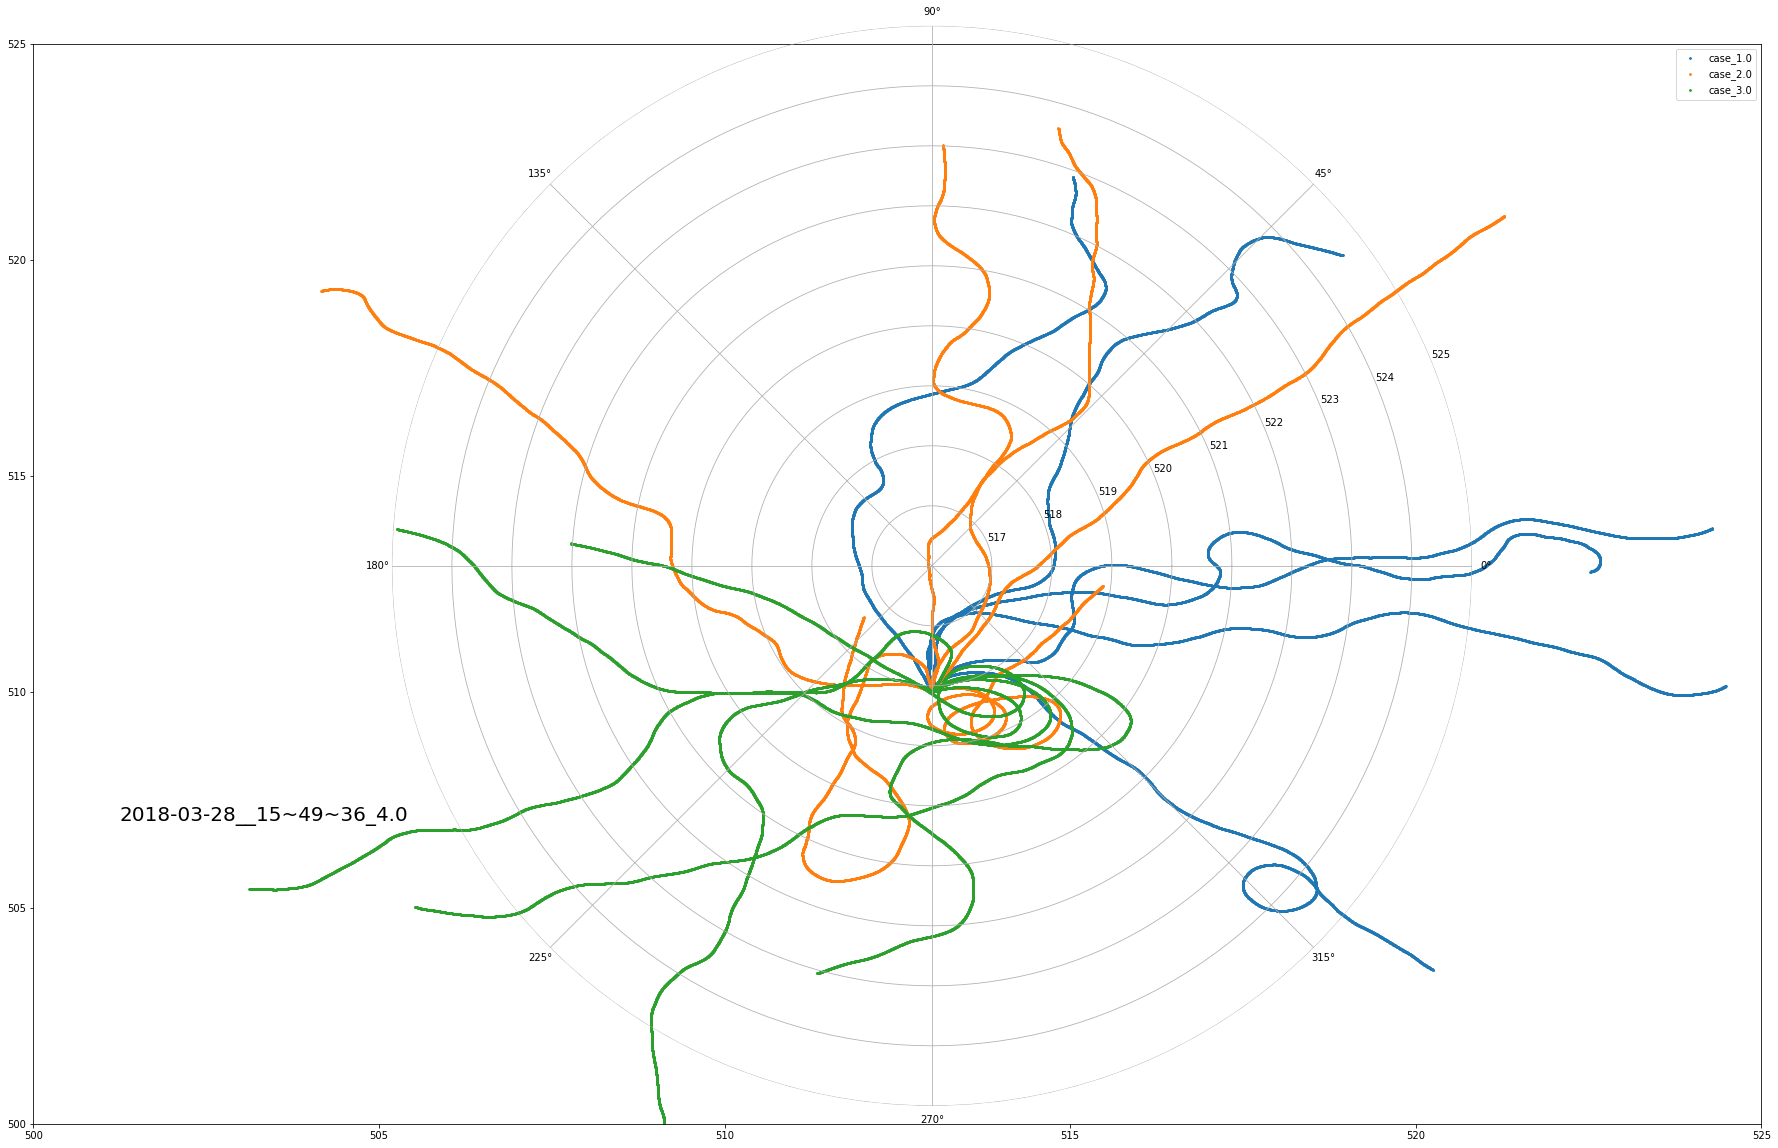

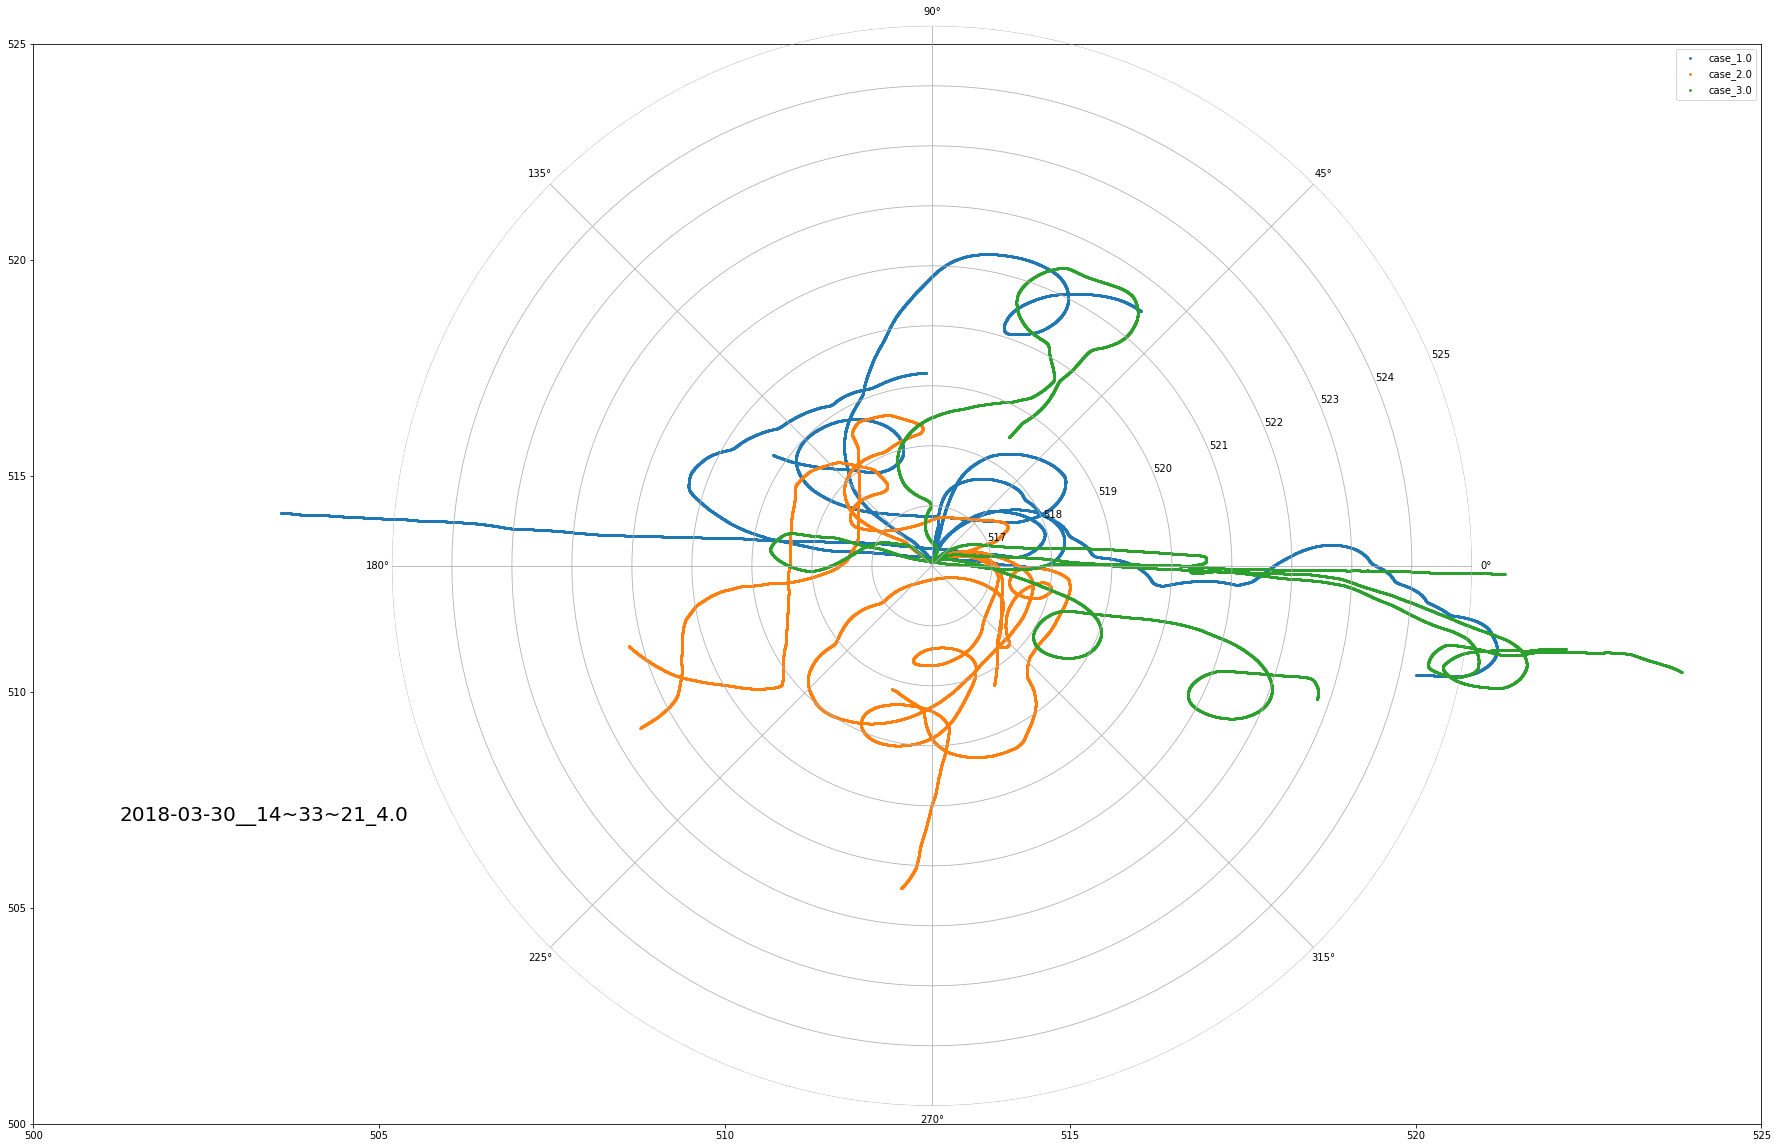

In [38]:
for file in files: #for each file
    df2 = dff[dff.timeStamp==file]
    wind_pressure_s = df2.windPressure.unique()
    for wind in wind_pressure_s: # for each wind speed in that file
        visual_s = df2[df2.windPressure==wind].visual.unique()
        for visual in visual_s: # for each visual stimulus type
#             run_num_s= df2[(df2.windPressure==wind) & (df2.visual == visual)].trajectory__runNum.unique()
#             for run in run_num_s: #for each run
                case_s = df2[(df2.windPressure==wind) & (df2.visual == visual) ].trajectory__case.unique()
                #case_plot = "trajectory_plots"+"/File_wise_trajectories/"
#                 if not os.path.exists(case_plot):
#                     os.makedirs(case_plot)
                fig=plt.figure(figsize=(8.0, 5.0))
                ax_carthesian  = fig.add_axes([0.1,0.1,3,3])
                ax_polar = fig.add_axes([0.16,0.15,3,3], polar=True, frameon=False)
                for i,case in enumerate(case_s):
                    df3=df2[df2.trajectory__case == case]
                    hndl=ax_carthesian.scatter(df3.trajectory__pPos_x,df3.trajectory__pPos_y,s=3,label="case_"+str(case))
                    ax_carthesian.legend()
                    #plt.scatter(df4.trajectory__pPos_x[0],df4.trajectory__pPos_y[0],s=20,c="red")
                    #print(df3.trajectory__pPos_x[df3.shape[0]-3],df3.trajectory__pPos_y[df3.shape[0]-3])
                    #plt.scatter(df4.trajectory__pPos_x[df4.shape[0]-1],df4.trajectory__pPos_y[df4.shape[0]-1],s=20,c="black")
                ax_polar.grid(True)
                ax_carthesian.set_xlim(500,525)
                ax_carthesian.set_ylim(500,525)
                ax_polar.set_rmin(516)
                ax_polar.set_rmax(525)
                fig.suptitle(file+"_"+str(wind), fontsize=20)
                #fig.savefig(case_plot+"w_"+wind+"_"+visual+file+".png",bbox_inches = 'tight')
                #plt.close()

In [40]:
files[len(files)-1]

'2018-03-30__14~33~21'

In [42]:
df_test=dff[dff.timeStamp==files[len(files)-1]]

In [44]:
# # def remove_initial_data_from_run()
# runs=df_test.trajectory__runNum.uniquie()
# for run in runs:
#     cases=df_test[df_test.runs==run].trajectory__case.unique()
#     for case in cases:
#         q_df=df_test[(df_test.runs==run) & (df_test.trajectory__case)]

In [45]:
df_test.shape

(37155, 21)

In [68]:
def plot_ori_servo(ori,servo,plt_name):
    fig=plt.figure(figsize=(20,10))
    plt.subplot(1,2,1, projection='polar')
    r=np.arange(0,servo.shape[0])
    plt.plot(np.pi*(servo)/180,r,label="Servo")
    plt.plot(np.pi*ori/180,r,label="Ori")
    plt.yticks(np.arange(0, 2500, 500))
    plt.legend()
    #plt.grid()
    plt.subplot(1,2,2)
    plt.plot(servo,label="Servo")
    plt.plot(ori,label="Ori")
    plt.legend()
    plt.grid()
    fig.suptitle(plt_name, fontsize=20)


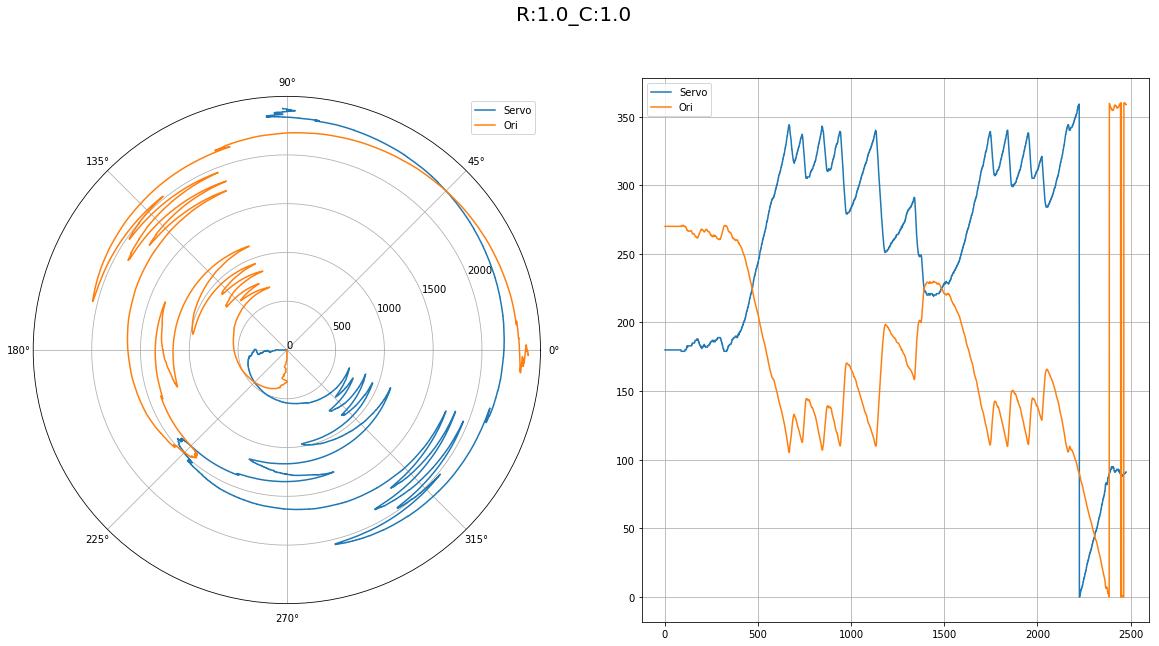

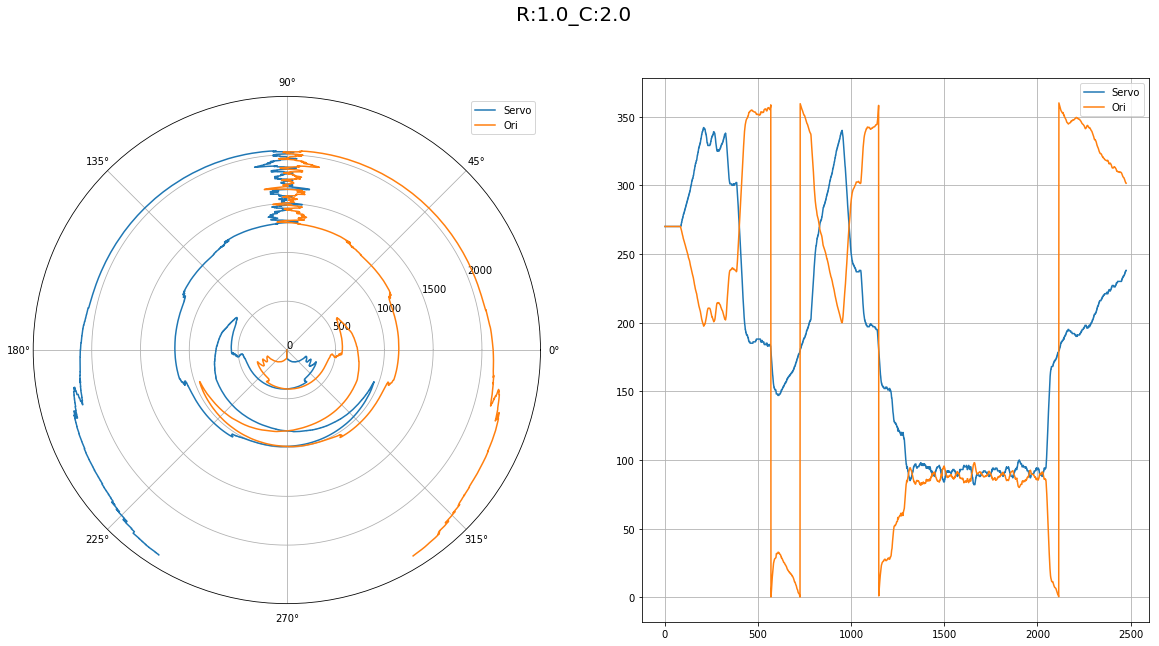

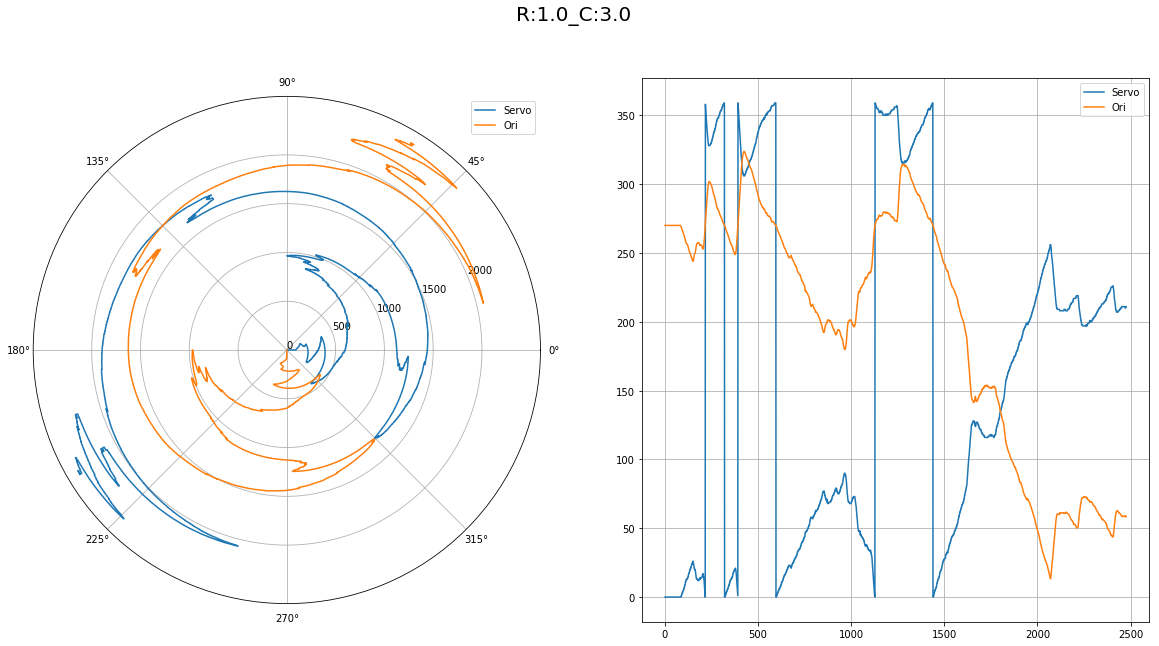

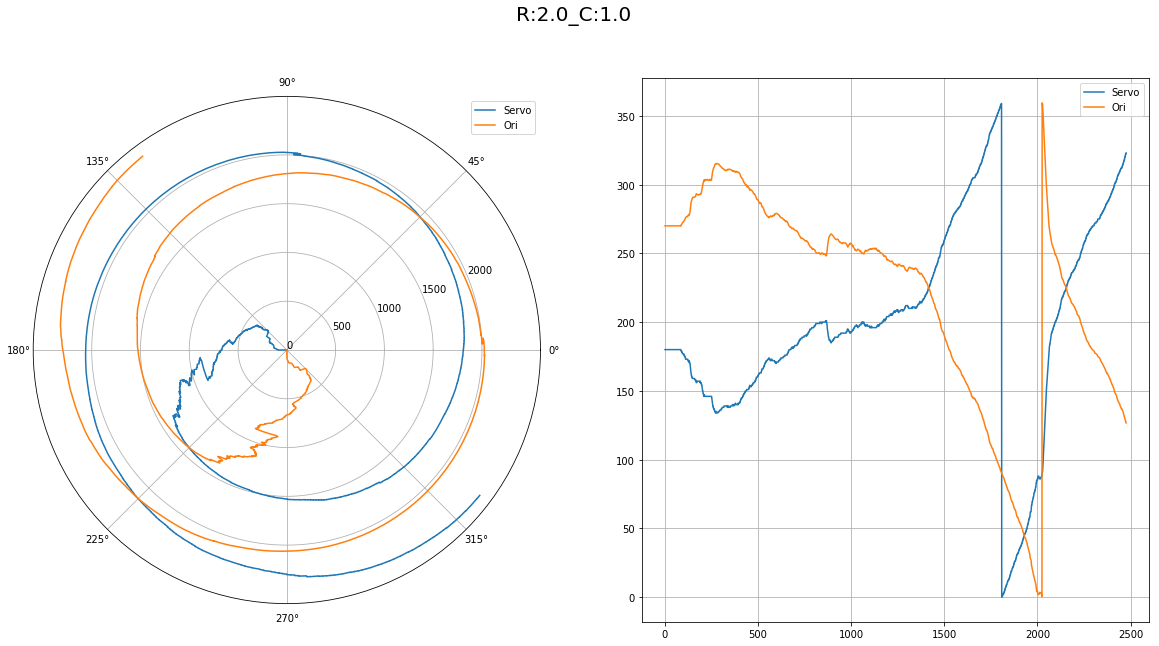

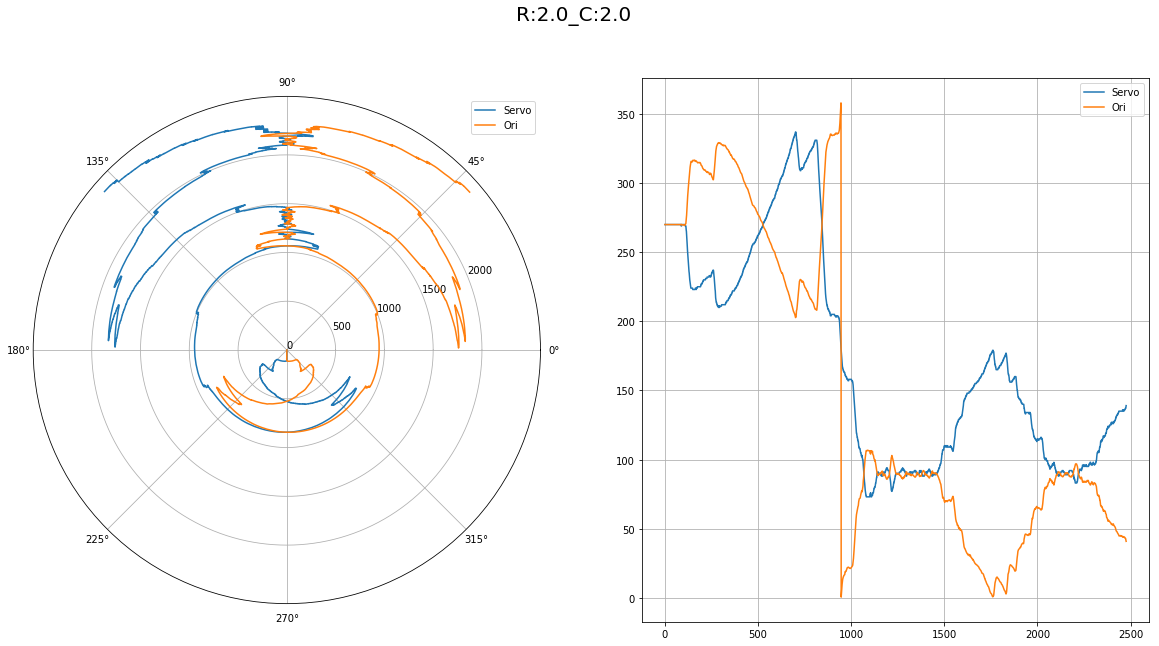

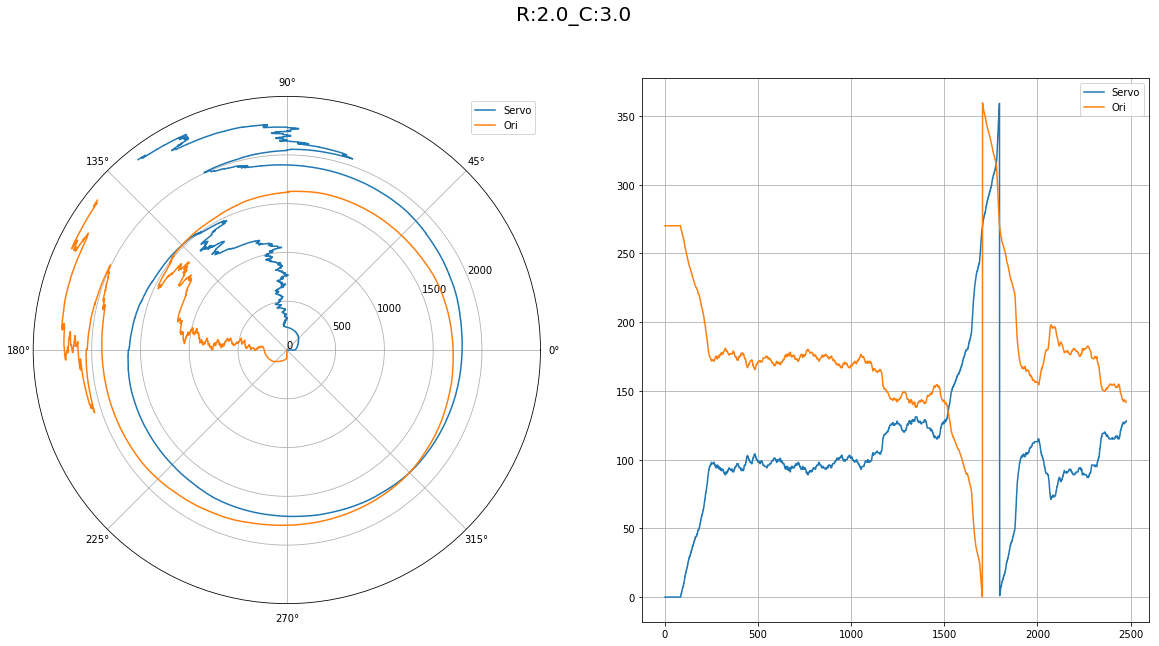

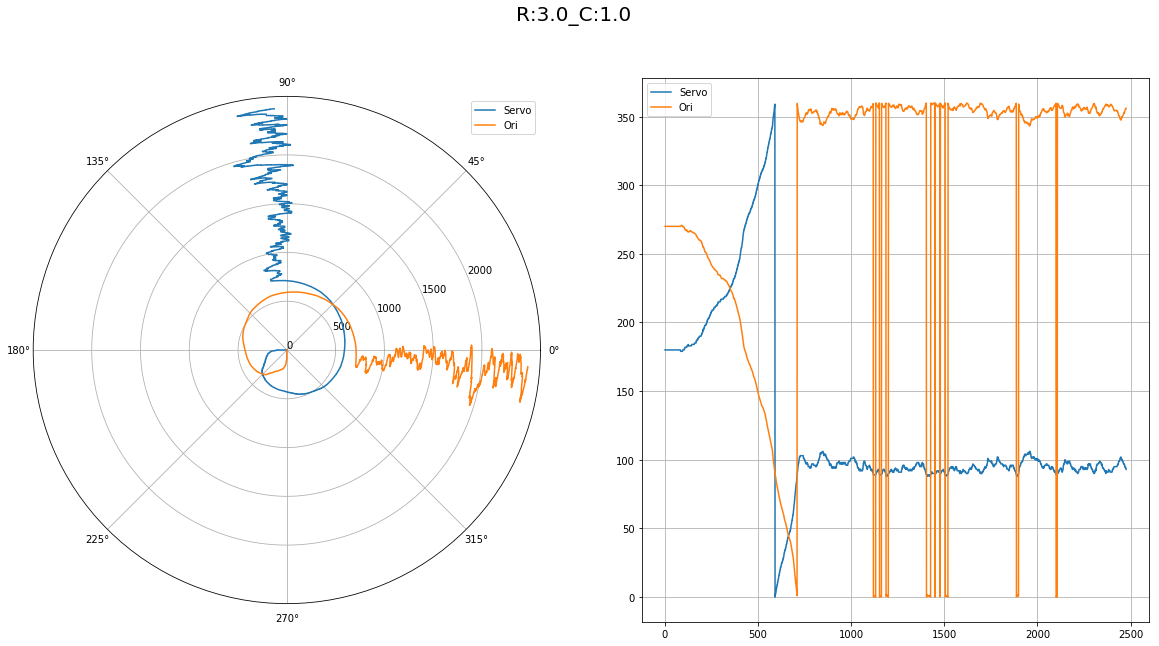

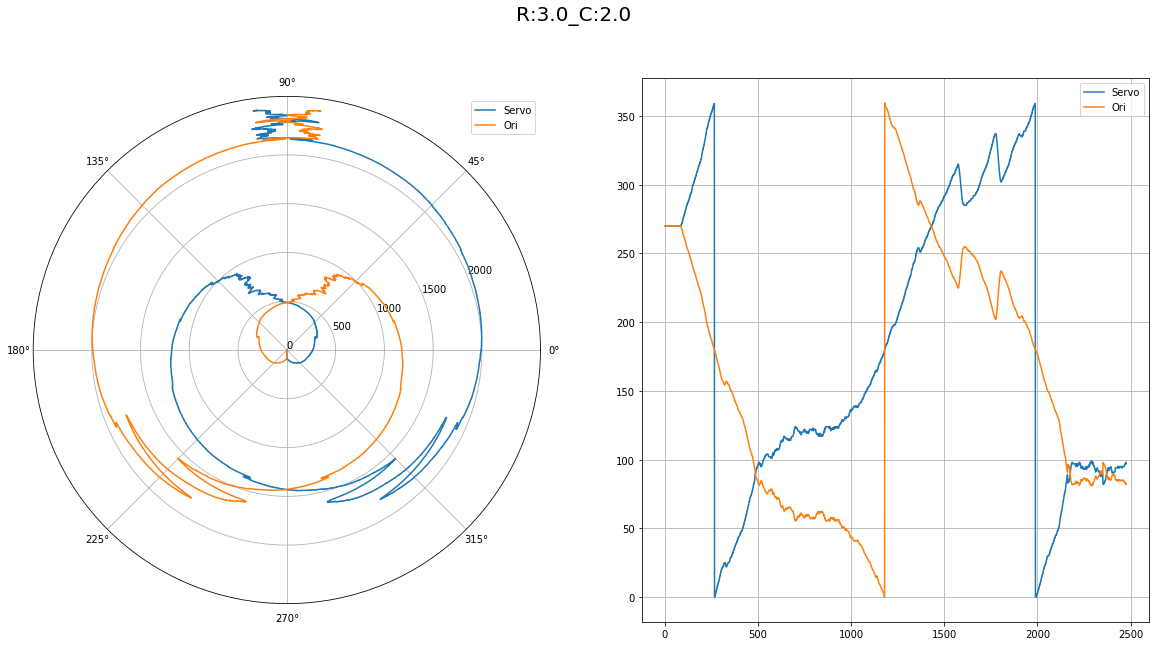

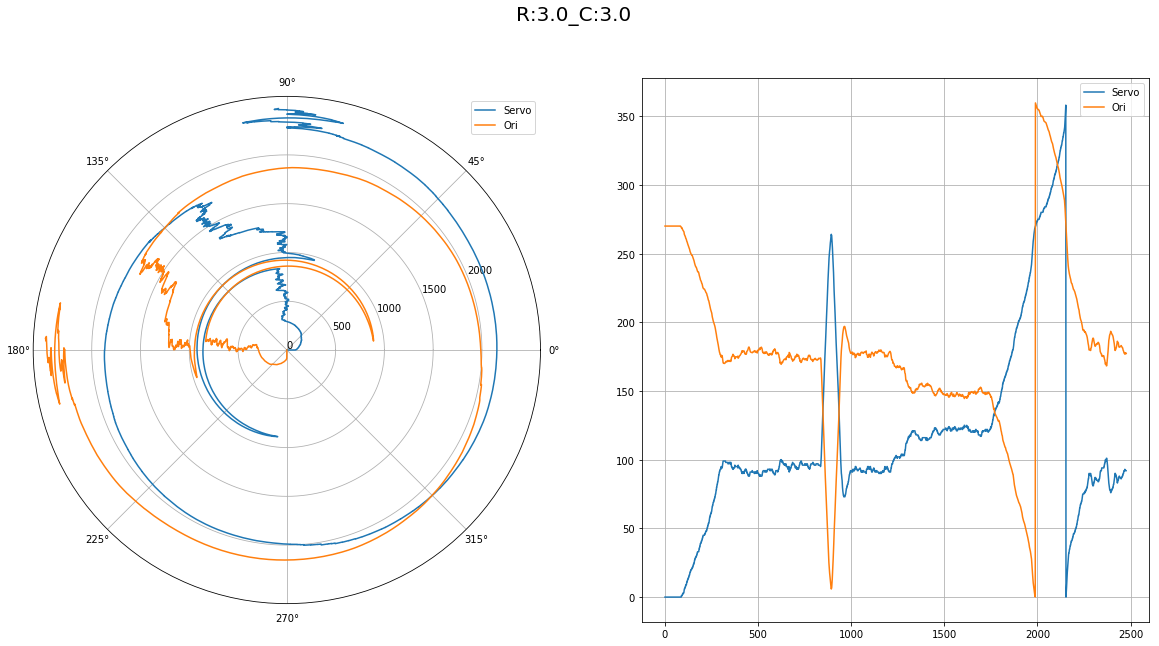

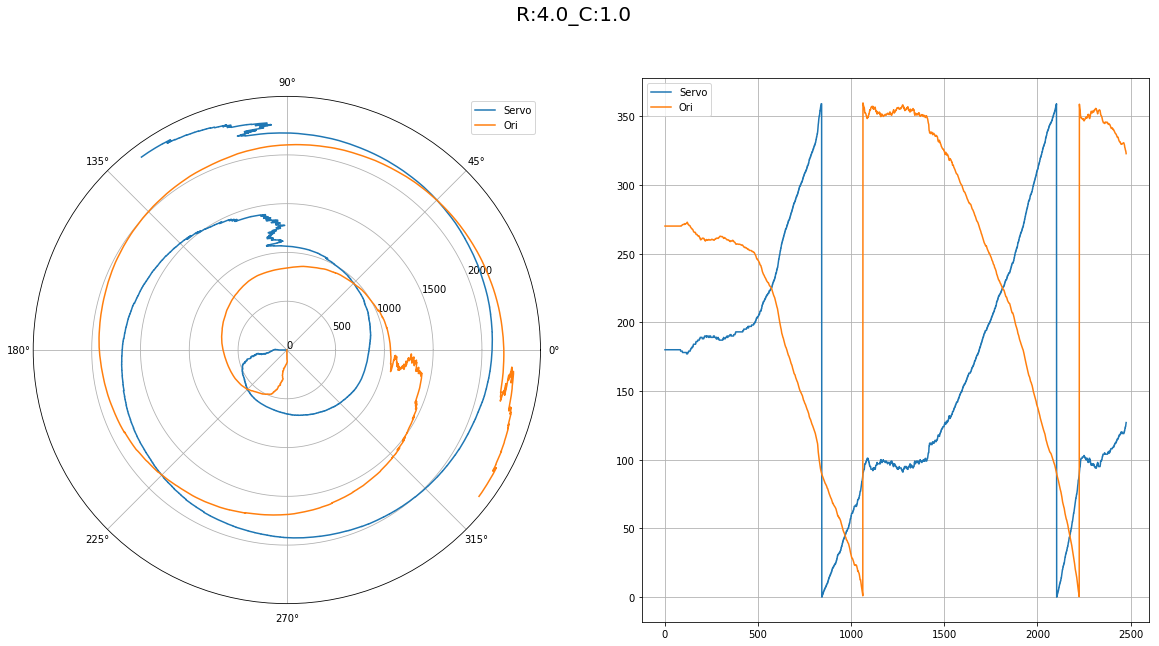

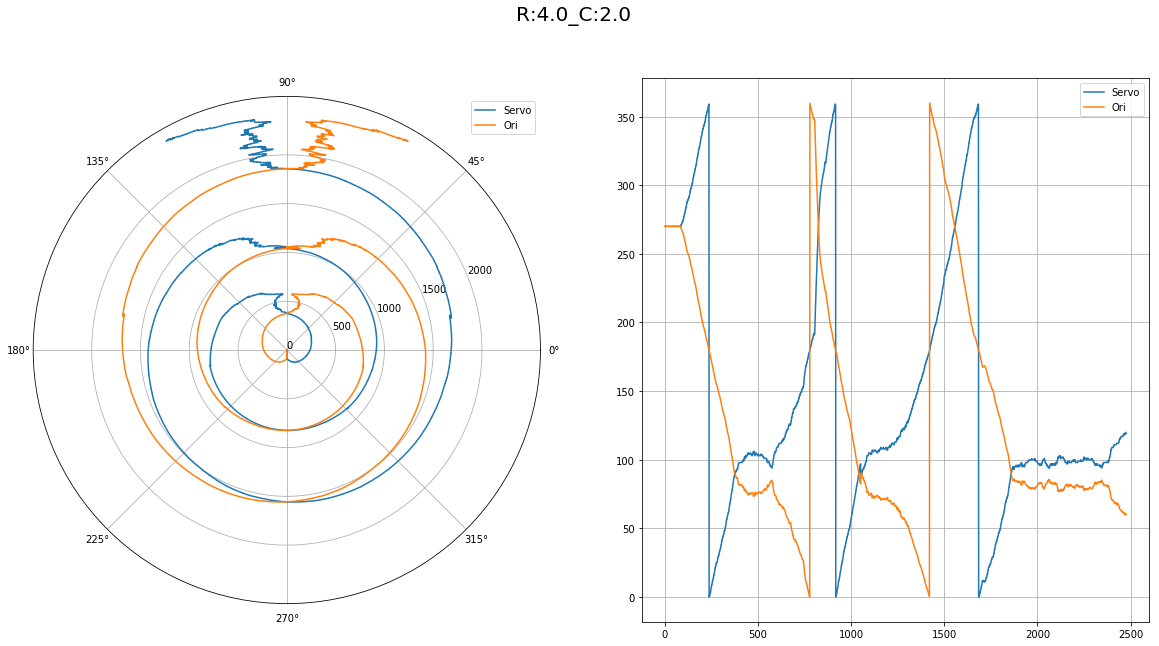

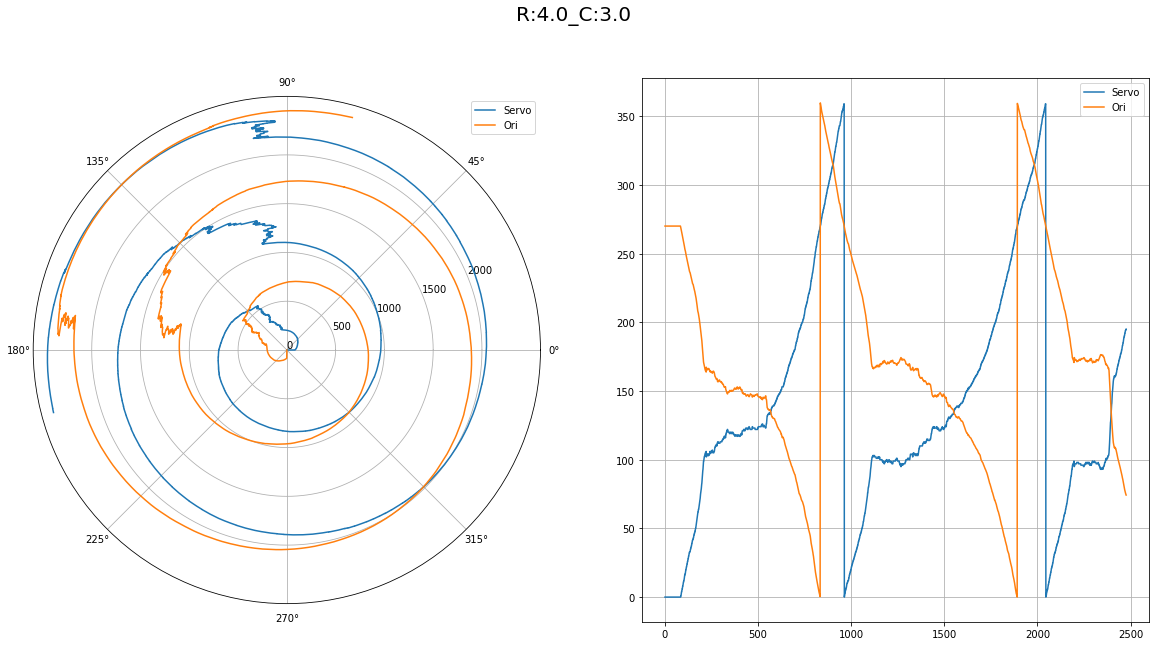

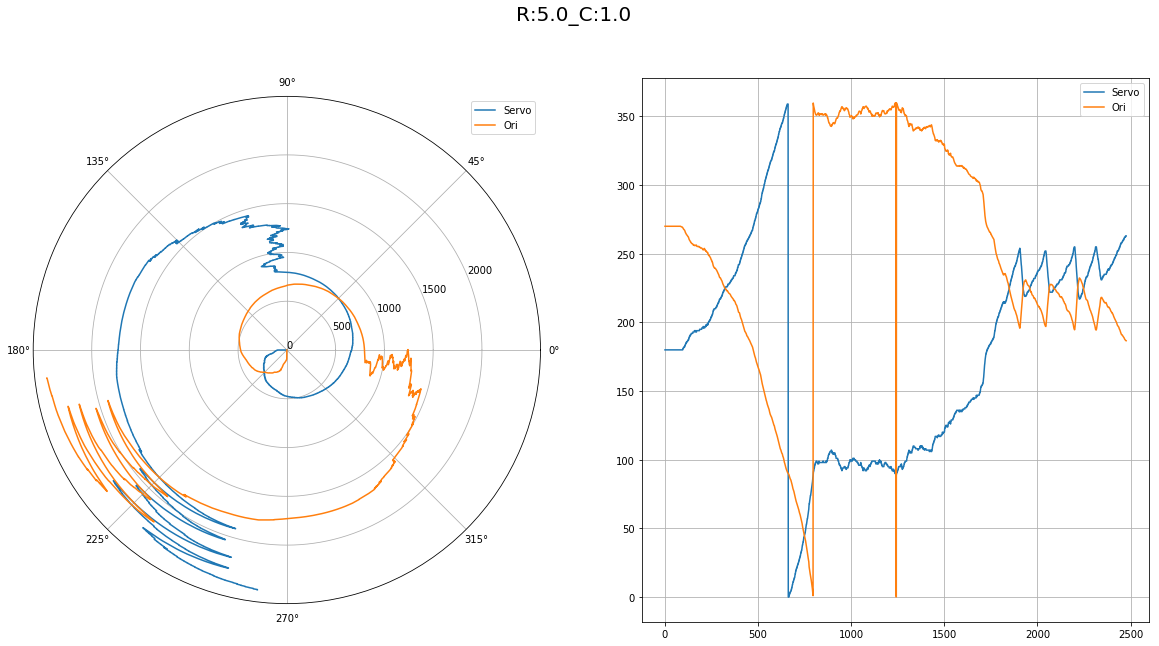

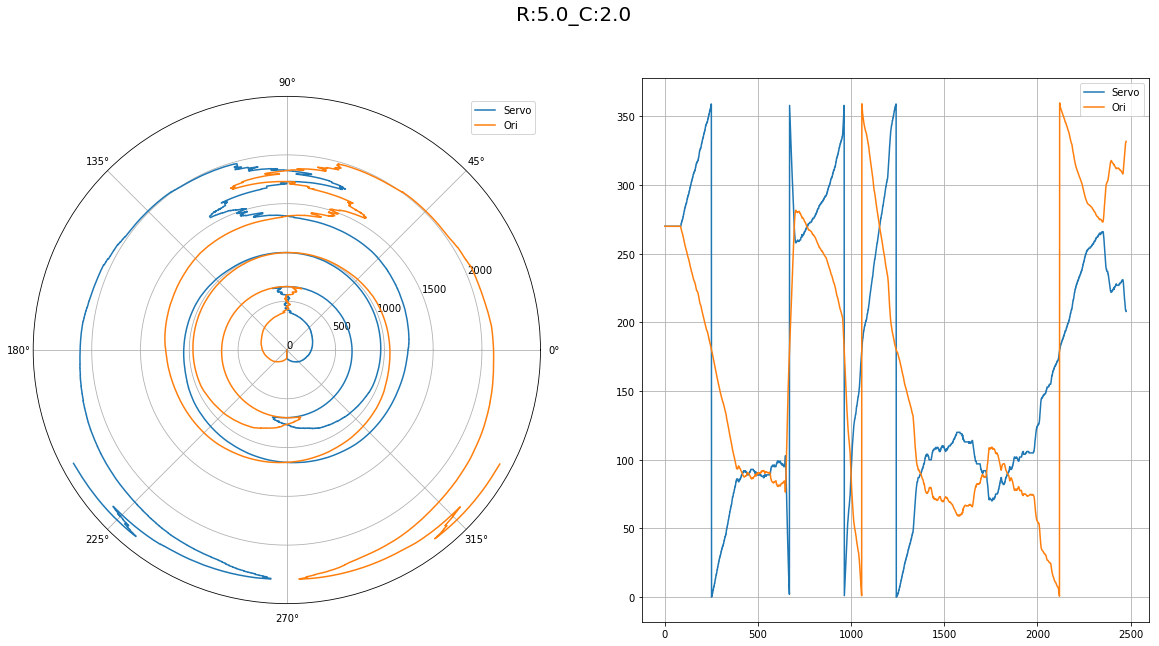

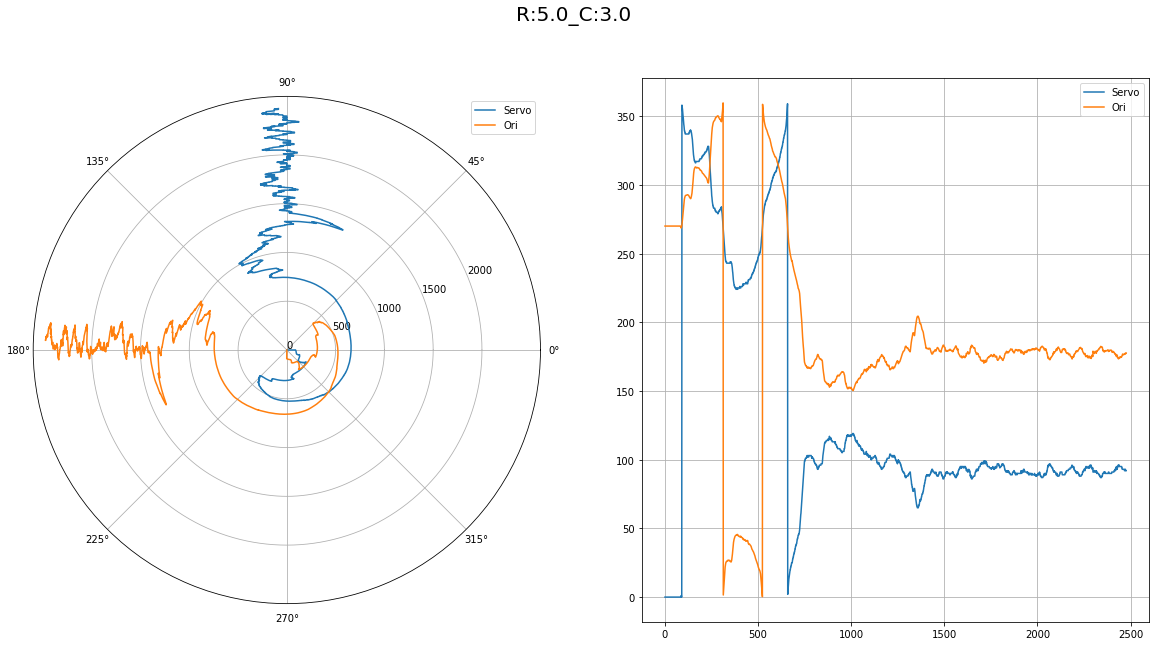

In [69]:
runs=df_test.trajectory__runNum.unique()
for run in runs:
    cases=df_test[df_test.trajectory__runNum==run].trajectory__case.unique()
    for case in cases:
        servo=df_test[(df_test.trajectory__runNum==run) & (df_test.trajectory__case==case)].trajectory__servoAngle.values
        ori=(df_test[(df_test.trajectory__runNum==run) & (df_test.trajectory__case==case)].trajectory__pOri_x.values-90)%360
        plot_ori_servo(ori,servo,"R:"+str(run)+"_"+"C:"+str(case))

        

In [70]:
tree = DecisionTreeRegressor(max_depth=10)

In [85]:
tree.fit(servo.reshape(-1,1),ori.reshape(-1,1))

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [74]:
from sklearn.tree import export_graphviz
import graphviz,re

In [75]:
s=export_graphviz(tree, out_file=None, feature_names=["wind_dir"], filled=True,
                      special_characters=True, rotate=True, precision=1)

In [86]:
y=tree.predict(servo.reshape(-1,1))

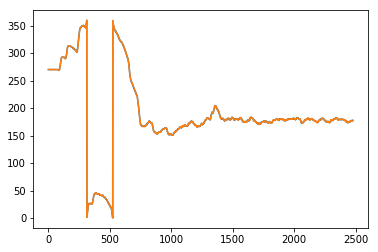

In [88]:
plt.plot(y)
plt.plot(ori)

In [149]:
servo=df_test[(df_test.trajectory__runNum==5) & (df_test.trajectory__case==3)].trajectory__servoAngle.values
ori=(df_test[(df_test.trajectory__runNum==5) & (df_test.trajectory__case==3)].trajectory__pOri_x.values-90)%360

In [150]:
y=tree.predict(servo.reshape(-1,1))

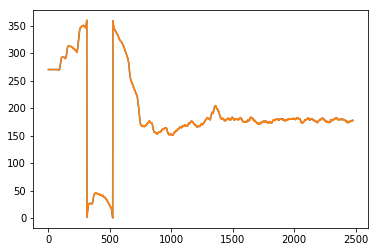

In [151]:
plt.plot(ori)
plt.plot(y)

In [152]:
tree2 = DecisionTreeRegressor(max_depth=10)

In [153]:
servo=df_test[(df_test.trajectory__runNum==5) & 
              (df_test.trajectory__case==3)].trajectory__servoAngle.values
ori=(df_test[(df_test.trajectory__runNum==5) & 
             (df_test.trajectory__case==3)].trajectory__pOri_x.values-90)%360
wbad=df_test[(df_test.trajectory__runNum==5) & 
             (df_test.trajectory__case==3)].trajectory__wbad.values

In [154]:
rss=tree2.fit(servo.reshape(-1,1),wbad.reshape(-1,1))

In [156]:
y=tree2.predict(servo.reshape(-1,1))

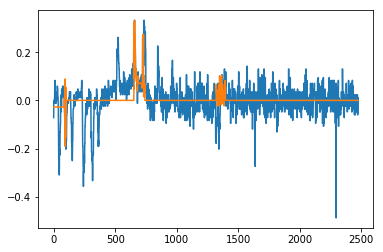

In [157]:
plt.plot(wbad)
plt.plot(y)

In [165]:
servo = df_test[(df_test.trajectory__runNum==5) & (df_test.trajectory__case==3)].trajectory__servoAngle.values
ori=((df_test[(df_test.trajectory__runNum==5) & (df_test.trajectory__case==3)].trajectory__pOri_x.values-90)%360)

In [159]:
tree.fit(servo.reshape(-1,1),ori.reshape(-1,1))

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [160]:
y=tree.predict(servo.reshape(-1,1))

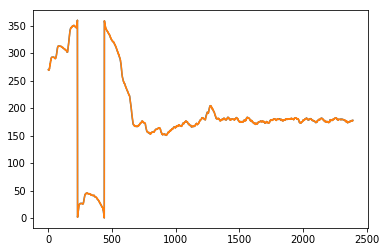

In [161]:
plt.plot(ori)
plt.plot(y)

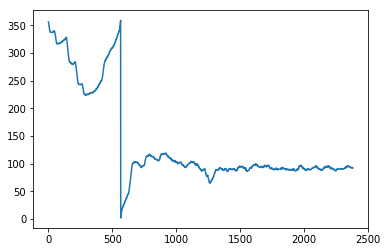

In [164]:
plt.plot(servo[10:])

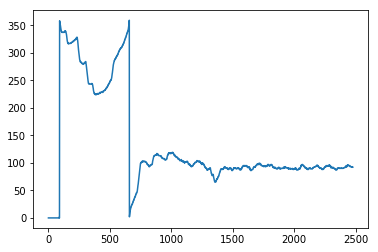

In [168]:
plt.plot(servo)

In [184]:
servo = df_test[(df_test.trajectory__runNum==5) & (df_test.trajectory__case==1)].trajectory__servoAngle.values
ori=(df_test[(df_test.trajectory__runNum==5) & (df_test.trajectory__case==1)].trajectory__pOri_x.values-90)

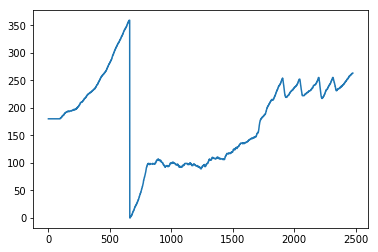

In [175]:
plt.plot(servo)

In [176]:
tree4 = DecisionTreeRegressor()

In [186]:

servo2=servo[100:-1].reshape(-1,1)
ori2=ori[101:].reshape(-1,1)
servo2=
tree4.fit(servo2,ori2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

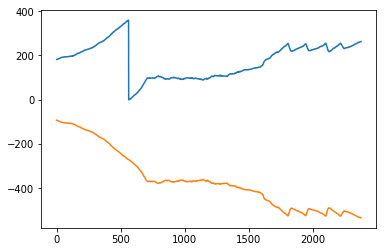

In [185]:
plt.plot(servo[100:-1])
plt.plot(ori[101:])

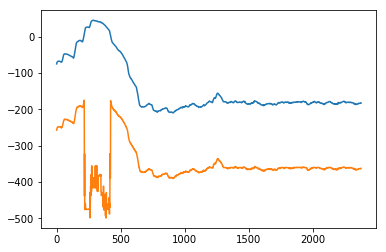

In [189]:
servo = df_test[(df_test.trajectory__runNum==5) & (df_test.trajectory__case==3)].trajectory__servoAngle.values
ori=(df_test[(df_test.trajectory__runNum==5) & (df_test.trajectory__case==3)].trajectory__pOri_x.values-90)
servo2=servo[100:-1].reshape(-1,1)
ori2=ori[101:].reshape(-1,1)
y=tree4.predict(servo2)
plt.plot(ori2)
plt.plot(y)

In [194]:
m1 = RandomForestRegressor(n_estimators=100,max_depth=20)
m1.fit(servo2,ori2)

/home/lsr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [211]:
servo2=servo[100:-1]
ori2=ori[101:]
idx=np.arange(servo2.shape[0])
np.random.shuffle(idx)

array([ 128, 2301,  103, ...,  310, 2248,  642])

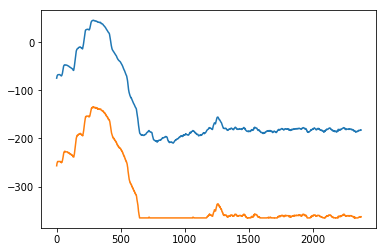

In [236]:
run=5
case=3
servo = df_test[(df_test.trajectory__runNum==run) & 
                (df_test.trajectory__case==case)].trajectory__servoAngle.values
ori=(df_test[(df_test.trajectory__runNum==run) & 
             (df_test.trajectory__case==case)].trajectory__pOri_x.values-90)


servo2=servo[100:-1]
ori2=ori[101:]
idx=np.arange(servo2.shape[0])
#np.random.shuffle(idx)
servo3=servo2[idx].reshape(-1,1)
ori3=ori2[idx].reshape(-1,1)
#m1.fit(servo3,ori3)
y=m1.predict(servo2.reshape(-1,1))
plt.plot(ori2)
plt.plot(y)

In [216]:
servo2

array([346., 344., 343., ...,  92.,  92.,  92.])

In [209]:
df[1:5]

trajectory__DCoffset  trajectory__case  \
2018-01-17 09:08:18.542435840                 -0.02               0.0   
2018-01-17 09:08:18.547606016                 -0.02               0.0   
2018-01-17 09:08:18.553721856                 -0.02               0.0   
2018-01-17 09:08:18.559709184                 -0.02               0.0   

                               trajectory__groundSpeed  \
2018-01-17 09:08:18.542435840                      0.0   
2018-01-17 09:08:18.547606016                      0.0   
2018-01-17 09:08:18.553721856                      0.0   
2018-01-17 09:08:18.559709184                      0.0   

                               trajectory__headingControl  \
2018-01-17 09:08:18.542435840                         0.0   
2018-01-17 09:08:18.547606016                         0.0   
2018-01-17 09:08:18.553721856                         0.0   
2018-01-17 09:08:18.559709184                         0.0   

                               trajectory__isFlying  trajectory__pOri_x  \
2018-01-17 09:08:18.542435840                   1.0                 0.0   
2018-01-17 09:08:18.547606016                   1.0                 0.0   
2018-01-17 09:08:18.553721856                   1.0                 0.0   
2018-01-17 09:08:18.559709184                   1.0                 0.0   

                               trajectory__pPos_x  trajectory__pPos_y  \
2018-01-17 09:08:18.542435840               513.0               513.0   
2018-01-17 09:08:18.547606016               513.0               513.0   
2018-01-17 09:08:18.553721856               513.0               513.0   
2018-01-17 09:08:18.559709184               513.0               513.0   

                               trajectory__pPos_z  trajectory__reset  \
2018-01-17 09:08:18.542435840                 1.3                0.0   
2018-01-17 09:08:18.547606016                 1.3                0.0   
2018-01-17 09:08:18.553721856                 1.3                0.0   
2018-01-17 09:08:18.559709184                 1.3                0.0   

                                       ...           trajectory__servoAngle  \
2018-01-17 09:08:18.542435840          ...                            270.0   
2018-01-17 09:08:18.547606016          ...                            270.0   
2018-01-17 09:08:18.553721856          ...                            270.0   
2018-01-17 09:08:18.559709184          ...                            270.0   

                               trajectory__slip  trajectory__speed  \
2018-01-17 09:08:18.542435840             270.0                0.0   
2018-01-17 09:08:18.547606016             270.0                0.0   
2018-01-17 09:08:18.553721856             270.0                0.0   
2018-01-17 09:08:18.559709184             270.0                0.0   

                               trajectory__trial  trajectory__wbad  \
2018-01-17 09:08:18.542435840                1.0          0.112766   
2018-01-17 09:08:18.547606016                1.0          0.112766   
2018-01-17 09:08:18.553721856                1.0          0.112766   
2018-01-17 09:08:18.559709184                1.0          0.112766   

                               trajectory__wbas  windPressure    visual  \
2018-01-17 09:08:18.542435840          1.906645           0.0  grassSky   
2018-01-17 09:08:18.547606016          1.906645           0.0  grassSky   
2018-01-17 09:08:18.553721856          1.982512           0.0  grassSky   
2018-01-17 09:08:18.559709184          1.982512           0.0  grassSky   

                              flowSource             timeStamp  
2018-01-17 09:08:18.542435840     direct  2018-01-17__14~38~15  
2018-01-17 09:08:18.547606016     direct  2018-01-17__14~38~15  
2018-01-17 09:08:18.553721856     direct  2018-01-17__14~38~15  
2018-01-17 09:08:18.559709184     direct  2018-01-17__14~38~15  

[4 rows x 21 columns]

In [239]:
m1 = RandomForestRegressor(n_estimators=1000,max_depth=200)
servo=df_test.trajectory__servoAngle.values
WBAD=df_test.trajectory__wbad.values
idx=np.arange(servo.shape[0])
idx=np.random.shuffle(idx)
servo3=servo2[idx].reshape(-1,1)
ori3=ori2[idx].reshape(-1,1)
m1.fit(servo3,ori3)
# plt.plot(ori2)
# plt.plot(y)

/home/lsr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

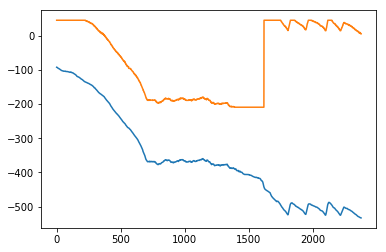

In [254]:
run=5
case=1
servo = df_test[(df_test.trajectory__runNum==run) & 
                (df_test.trajectory__case==case)].trajectory__servoAngle.values
ori=(df_test[(df_test.trajectory__runNum==run) & 
             (df_test.trajectory__case==case)].trajectory__pOri_x.values-90)


servo2=servo[100:-1]
ori2=ori[101:]
idx=np.arange(servo2.shape[0])
#np.random.shuffle(idx)
servo3=servo2[idx].reshape(-1,1)
ori3=ori2[idx].reshape(-1,1)
#m1.fit(servo3,ori3)
y=m1.predict(servo2.reshape(-1,1))
plt.plot(ori2)
plt.plot(y)

In [255]:
df_test2=dff[dff.timeStamp==files[len(files)-2]]

In [ ]:
=df_test[(df_test.trajectory__runNum==run) & 
                (df_test.trajectory__case==case)].trajectory__servoAngle.values